# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>





## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [3]:
#1.IMPORTING THE NECESSARY LIBRARIES

import os
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import warnings
warnings.filterwarnings('ignore')


In [4]:
#LOADING DATA

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
path='//content/drive/MyDrive/csv files/SeoulBikeData.csv'

In [6]:
bike_df=pd.read_csv(path,encoding='latin')

In [7]:
#understanding more about data

bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [8]:
bike_df.shape

(8760, 14)

In [9]:
#printing features of dataset
bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [10]:
#check details about the data set
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [11]:
bike_df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [12]:
bike_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


* ***This Dataset contains 8760 lines and 14 columns.*** 
***In a day we have 24 hours and we have 365 days a year so 365 multiplied by 24 = 8760, which represents the number of line in the dataset.*** 

#**Features description**

**Breakdown of Our Features:**

**Date** : *The date of the day, during 365 days from 01/12/2017 to 30/11/2018, formating in DD/MM/YYYY, type : str*, we need to convert into datetime format.

**Rented Bike Count** : *Number of rented bikes per hour which our dependent variable and we need to predict that, type : int*

**Hour**: *The hour of the day, starting from 0-23 it's in a digital time format, type : int, we need to convert it into category data type.*

**Temperature(°C)**: *Temperature in Celsius, type : Float*

**Humidity(%)**: *Humidity in the air in %, type : int*

**Wind speed (m/s)** : *Speed of the wind in m/s, type : Float*

**Visibility (10m)**: *Visibility in m, type : int*

**Dew point temperature(°C)**: *Temperature at the beggining of the day, type : Float*

**Solar Radiation (MJ/m2)**: *Sun contribution, type : Float*

**Rainfall(mm)**: *Amount of raining in mm, type : Float*

**Snowfall (cm)**: *Amount of snowing in cm, type : Float*

**Seasons**: *Season of the year, type : str, there are only 4 season's in data *. 

**Holiday**: *If the day  is holiday period or not, type: str*

**Functioning Day**: *If the day is a Functioning Day or not, type : str*


# **Preprocessing the dataset**

**Why do we need to handle missing values?**
* ***The real-world data often has a lot of missing values. The cause of missing values can be data corruption or failure to record data. The handling of missing data is very important during the preprocessing of the dataset as many machine learning algorithms do not support missing values.that's why we check missing values first*** 

##Missing values

In [13]:
#check for count of missing values in each column.
bike_df.isna().sum()


Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

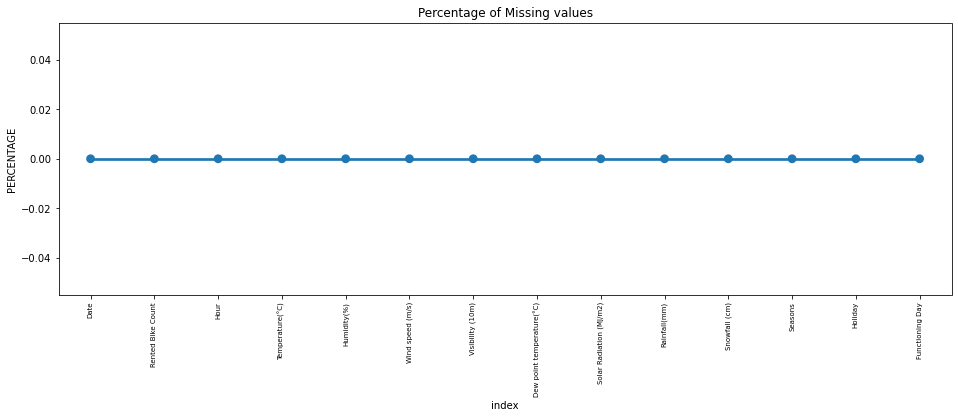

In [14]:
missing = pd.DataFrame((bike_df.isnull().sum())*100/bike_df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

* ***As we can see above there are no missing value presents thankfully***

##Duplicate values

In [15]:
# Checking Duplicate Values
value=len(bike_df[bike_df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


* ***In the above data after count the missing and duplicate value we came to know that there are no missing and duplicate value present.***

* ***Some of  the columns name in the dataset are too large and clumsy so we change the the into some simple name, and it don't affect our end results.***

##Changing column name

In [16]:
#Rename the complex columns name
bike_df=bike_df.rename(columns={'Rented Bike Count':'Rented_Bike_Count',
                                'Temperature(°C)':'Temperature',
                                'Humidity(%)':'Humidity',
                                'Wind speed (m/s)':'Wind_speed',
                                'Visibility (10m)':'Visibility',
                                'Dew point temperature(°C)':'Dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'Solar_Radiation',
                                'Rainfall(mm)':'Rainfall',
                                'Snowfall (cm)':'Snowfall',
                                'Functioning Day':'Functioning_Day'})

* ***Python read "Date" column as a object type basically it reads as a string, as the date column is very important to analyze the users behaviour so we need to convert it into datetime format then we split it into 3 column i.e 'year', 'month', 'day'as a category data type.***

##Breaking date column

In [17]:
# Changing the "Date" column into three "year","month","day" column
bike_df['Date'] = bike_df['Date'].apply(lambda x: 
                                    dt.datetime.strptime(x,"%d/%m/%Y"))

In [18]:
bike_df['year'] = bike_df['Date'].dt.year
bike_df['month'] = bike_df['Date'].dt.month
bike_df['day'] = bike_df['Date'].dt.day_name()

In [19]:
#creating a new column of "weekdays_weekend" and drop the column "Date","day","year"
bike_df['weekdays_weekend']=bike_df['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
bike_df=bike_df.drop(columns=['Date','day','year'],axis=1)

* ***So we convert the "date" column into 3 different column i.e "year","month","day".***
* ***The "year" column in our data set is basically contain the 2 unique number contains the details of from 2017 december to 2018 november so if i consider this is a one year then we don't need the "year" column so we drop it***.
* ***The other column "day", it contains the details about the each day of the month, for our relevence we don't need each day of each month data but we need the data about, if a day is a weekday or a weekend so we convert it into this format and drop the "day" column***.

In [20]:
bike_df.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


In [21]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented_Bike_Count      8760 non-null   int64  
 1   Hour                   8760 non-null   int64  
 2   Temperature            8760 non-null   float64
 3   Humidity               8760 non-null   int64  
 4   Wind_speed             8760 non-null   float64
 5   Visibility             8760 non-null   int64  
 6   Dew_point_temperature  8760 non-null   float64
 7   Solar_Radiation        8760 non-null   float64
 8   Rainfall               8760 non-null   float64
 9   Snowfall               8760 non-null   float64
 10  Seasons                8760 non-null   object 
 11  Holiday                8760 non-null   object 
 12  Functioning_Day        8760 non-null   object 
 13  month                  8760 non-null   int64  
 14  weekdays_weekend       8760 non-null   int64  
dtypes: f

In [22]:
bike_df['weekdays_weekend'].value_counts()

0    6264
1    2496
Name: weekdays_weekend, dtype: int64

##Changing data type

* ***As "Hour","month","weekdays_weekend" column are show as a integer data type but actually it is a category data tyepe. so we need to change this data tyepe if we not then, while doing the further anlysis and correleted with this then the values are not actually true so we can get mislead by this.***

In [23]:
bike_df.nunique()

Rented_Bike_Count        2166
Hour                       24
Temperature               546
Humidity                   90
Wind_speed                 65
Visibility               1789
Dew_point_temperature     556
Solar_Radiation           345
Rainfall                   61
Snowfall                   51
Seasons                     4
Holiday                     2
Functioning_Day             2
month                      12
weekdays_weekend            2
dtype: int64

In [24]:
#Change the int64 column into catagory column
cols=['Hour','month','weekdays_weekend']
for col in cols:
  bike_df[col]=bike_df[col].astype('category')

In [25]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Rented_Bike_Count      8760 non-null   int64   
 1   Hour                   8760 non-null   category
 2   Temperature            8760 non-null   float64 
 3   Humidity               8760 non-null   int64   
 4   Wind_speed             8760 non-null   float64 
 5   Visibility             8760 non-null   int64   
 6   Dew_point_temperature  8760 non-null   float64 
 7   Solar_Radiation        8760 non-null   float64 
 8   Rainfall               8760 non-null   float64 
 9   Snowfall               8760 non-null   float64 
 10  Seasons                8760 non-null   object  
 11  Holiday                8760 non-null   object  
 12  Functioning_Day        8760 non-null   object  
 13  month                  8760 non-null   category
 14  weekdays_weekend       8760 non-null   c

In [26]:
bike_df['weekdays_weekend'].unique()

[0, 1]
Categories (2, int64): [0, 1]

# **Exploratory Data Analysis Of The Data Set**

Why do we perform EDA?

An EDA is a thorough examination meant to uncover the underlying structure of a data set and is important for a company because it exposes trends, patterns, and relationships that are not readily apparent.

## **Univariate Analysis**

**Why do you do univariate analysis?**
* ***The key objective of Univariate analysis is to simply describe the data to find patterns within the data.*** 

## **Analysis of Dependent Variable:**

* ***Our dependent variable is "Rented Bike Count" so we need to analysis this column with the other columns by using some visualisation plot.first we analyze the category data tyep then we proceed with the numerical data type***

####Month

[Text(0.5, 1.0, 'Count of Rented bikes acording to Month ')]

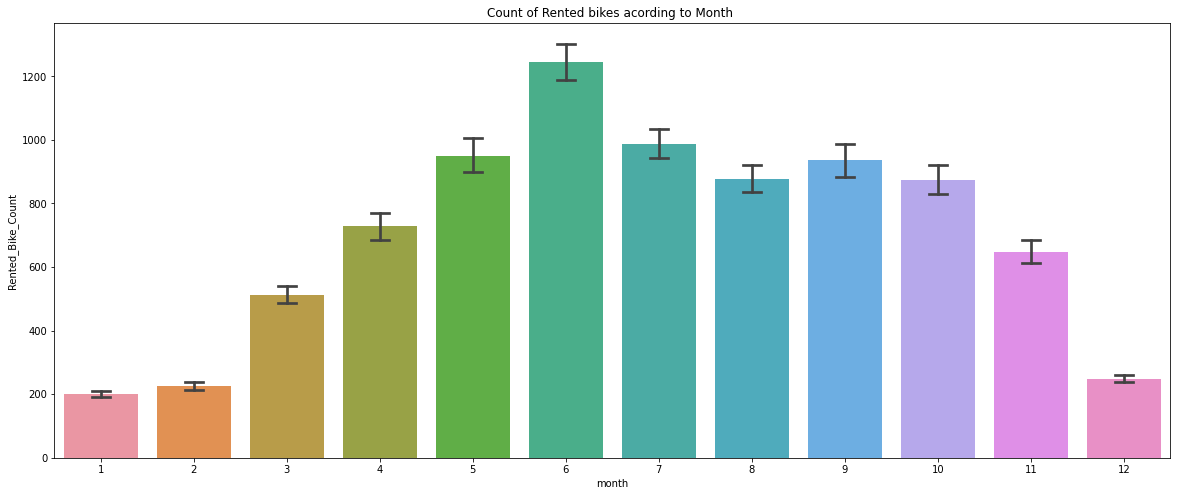

In [27]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=bike_df,x='month',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Month ')

* ***From the above bar plot we can clearly say that from  the month 5 to 10 the demand of the rented bike is high as compare to other months.these months are comes inside the summer season.***

####weekdays_weekend

[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays and weekend ')]

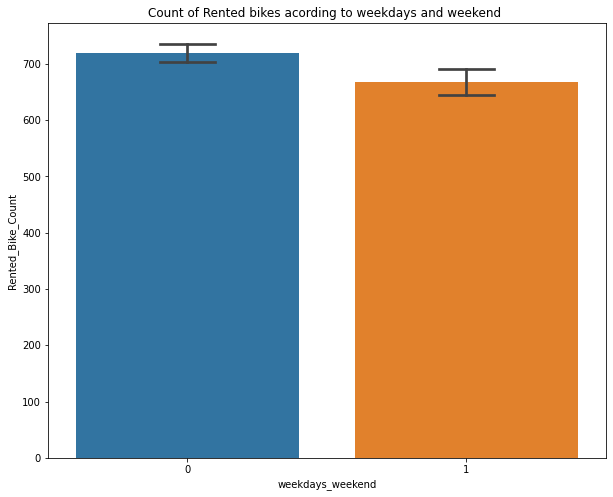

In [28]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=bike_df,x='weekdays_weekend',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to weekdays and weekend ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays_weekend ')]

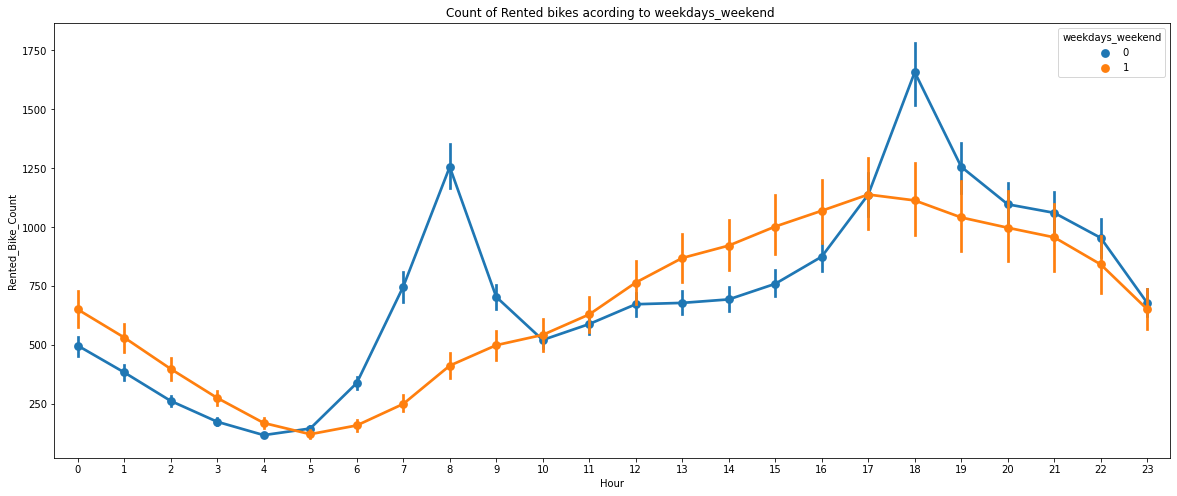

In [29]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_Count',hue='weekdays_weekend',ax=ax)
ax.set(title='Count of Rented bikes acording to weekdays_weekend ')

* ***From the above point plot and bar plot we can say that in the week days which represent in blue colur show that the demand of the bike higher because of the office.***
***Peak Time are 7 am to 9 am and 5 pm to 7 pm***
***The orange colur represent the weekend days, and it show that the demand of rented bikes are very low specially in the morning hour but when the evening start from 4 pm to 8 pm the demand slightly increases.***   

####Hour

[Text(0.5, 1.0, 'Count of Rented bikes acording to Hour ')]

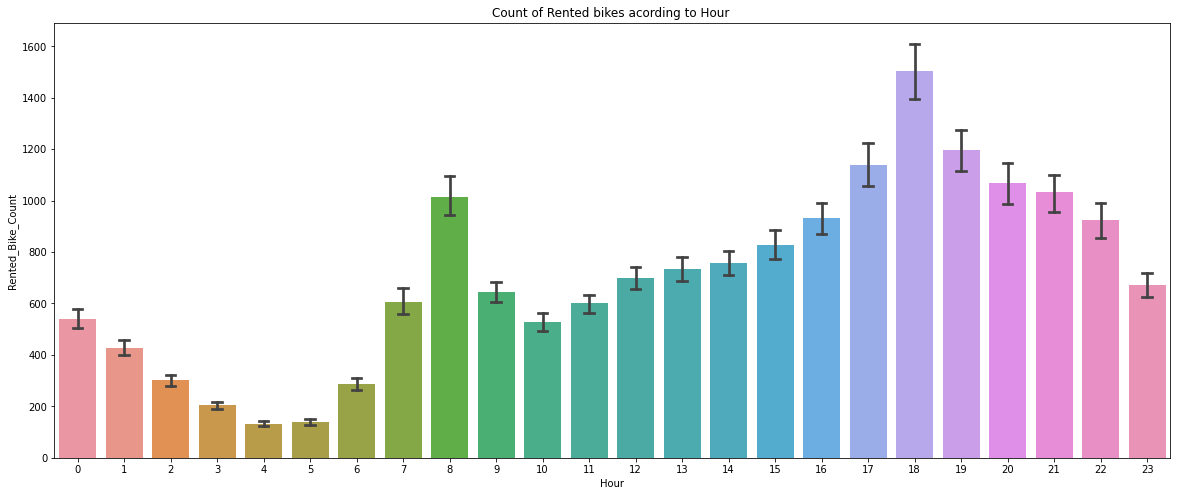

In [30]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=bike_df,x='Hour',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Hour ')

####Functioning Day

[Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day ')]

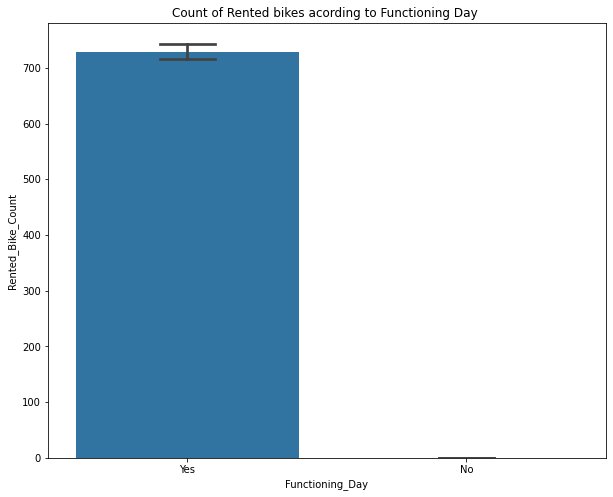

In [31]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=bike_df,x='Functioning_Day',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Functioning Day ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day ')]

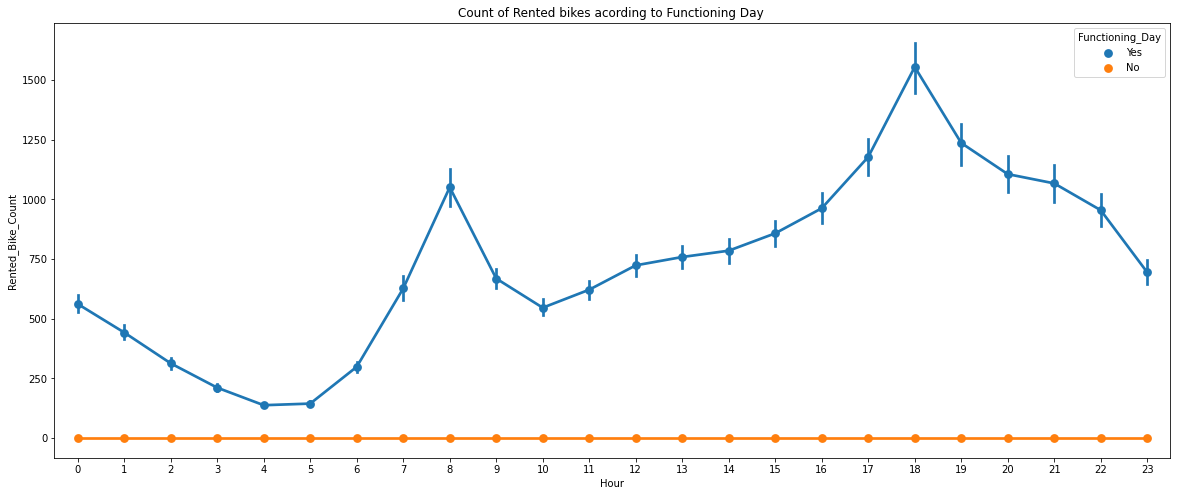

In [32]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_Count',hue='Functioning_Day',ax=ax)
ax.set(title='Count of Rented bikes acording to Functioning Day ')

* ***In the above bar plot and point plot which shows the use of rented bike in functioning daya or not, and it clearly shows that,***
* ***Peoples dont use reneted bikes in no functioning day.*** 

####Seasons

[Text(0.5, 1.0, 'Count of Rented bikes acording to Seasons ')]

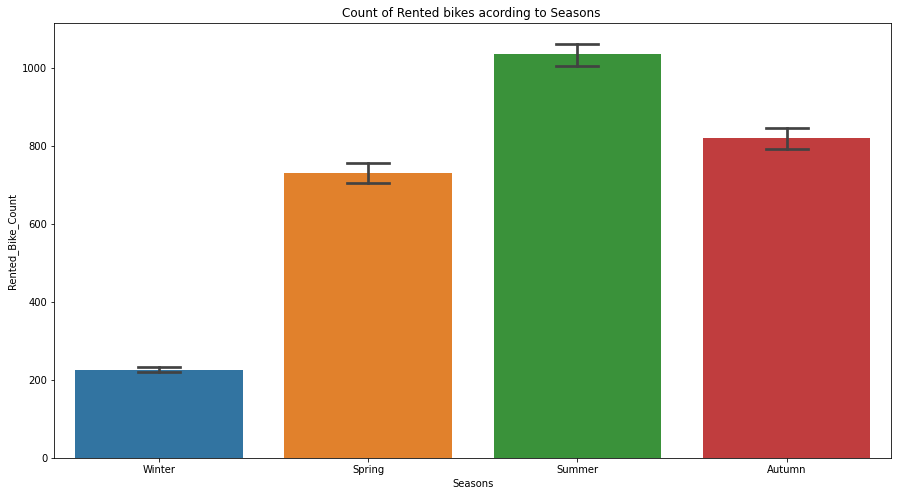

In [33]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=bike_df,x='Seasons',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Seasons ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to seasons ')]

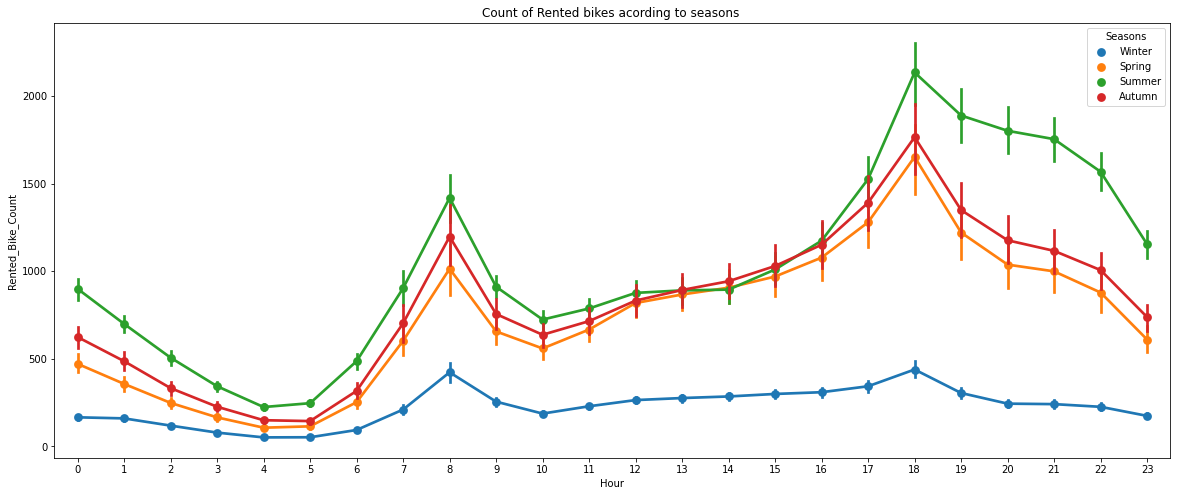

In [34]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_Count',hue='Seasons',ax=ax)
ax.set(title='Count of Rented bikes acording to seasons ')

* ***In the above bar plot and point plot which shows the use of rented bike in in four different seasons, and it clearly shows that,***
* ***In summer season the use of rented bike is high and peak time is 7am-9am and 7pm-5pm.***
* ***In winter season the use of rented bike is very low because of snowfall.***

###Holiday

[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday ')]

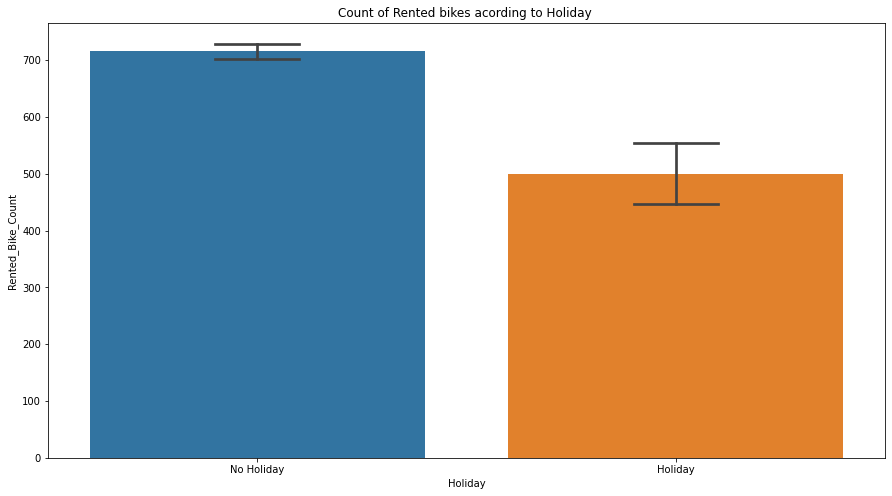

In [35]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=bike_df,x='Holiday',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Holiday ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday ')]

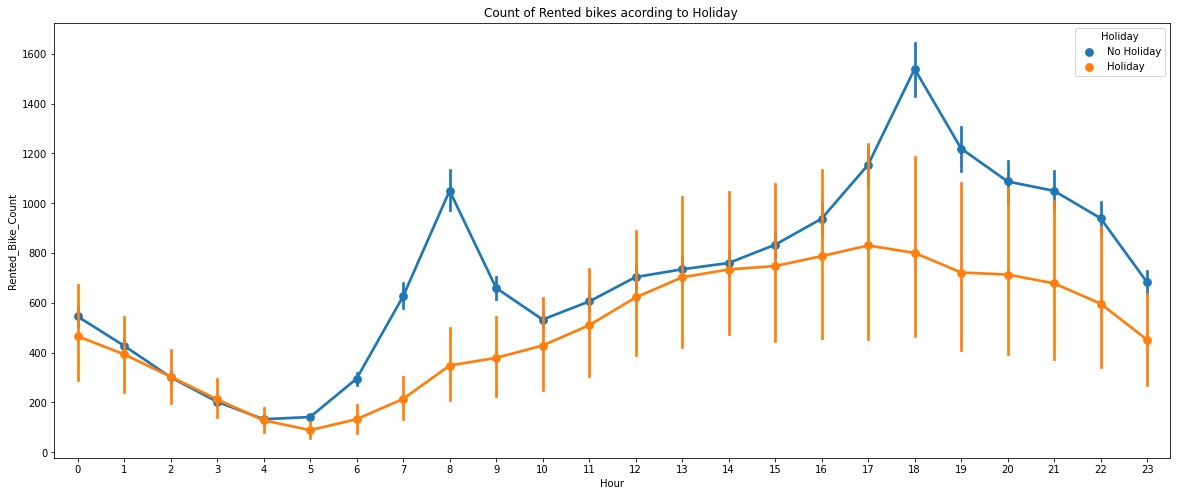

In [36]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_Count',hue='Holiday',ax=ax)
ax.set(title='Count of Rented bikes acording to Holiday ')

* ***In the above bar plot and point plot which shows the use of rented bike in a holiday, and it clearly shows that,***
* ***plot shows that in holiday people uses the rented bike from 2pm-8pm***

**What is Numerical Data**

* ***Numerical data is a data type expressed in numbers, rather than natural language description. Sometimes called quantitative data, numerical data is always collected in number form. Numerical data differentiates itself from other number form data types with its ability to carry out arithmetic operations with these numbers.***

#### Analyze of Numerical variables distplots

In [37]:
#assign the numerical coulmn to variavle
numerical_columns=list(bike_df.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall'],
      dtype='object')

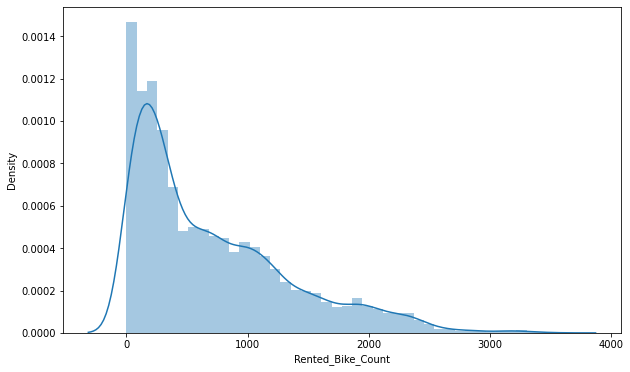

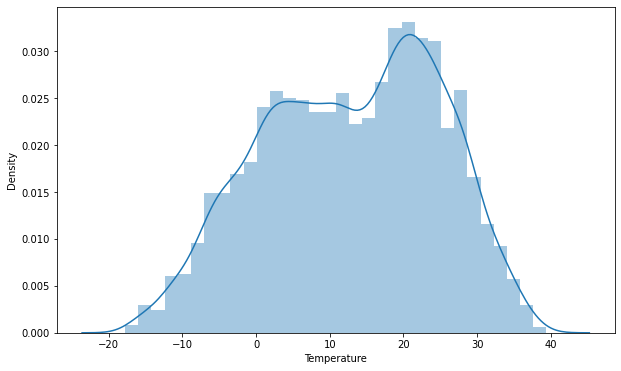

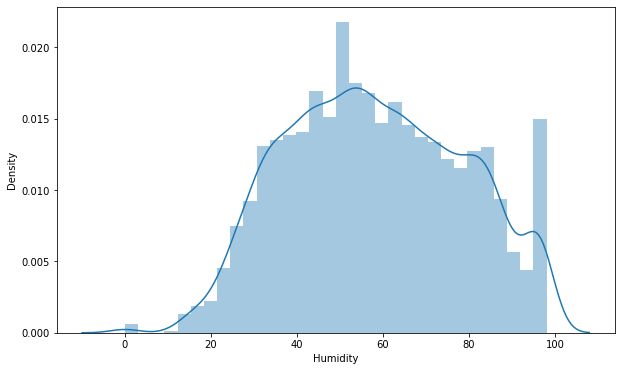

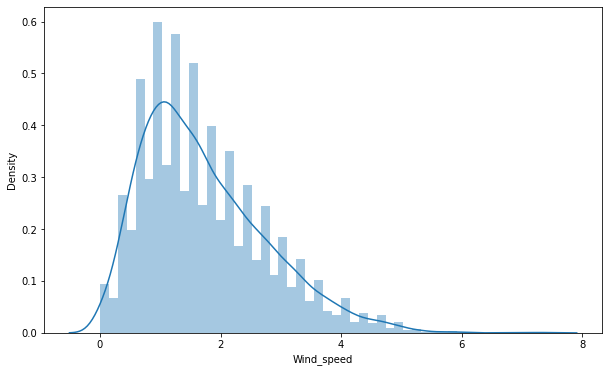

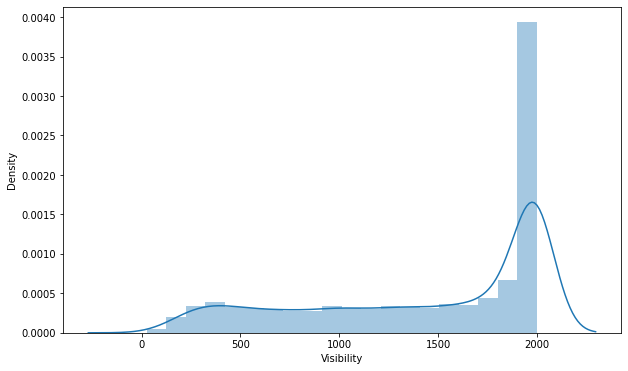

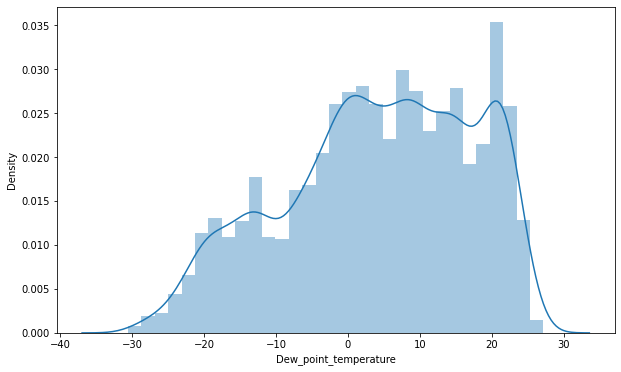

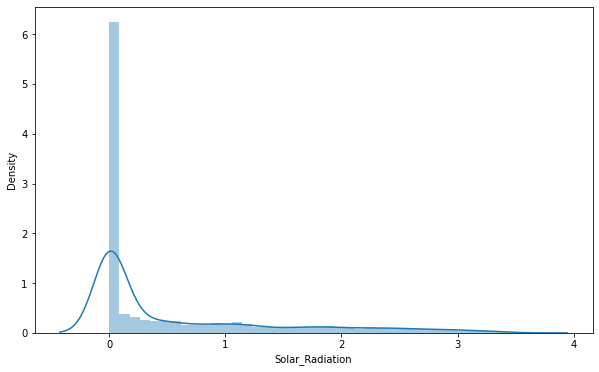

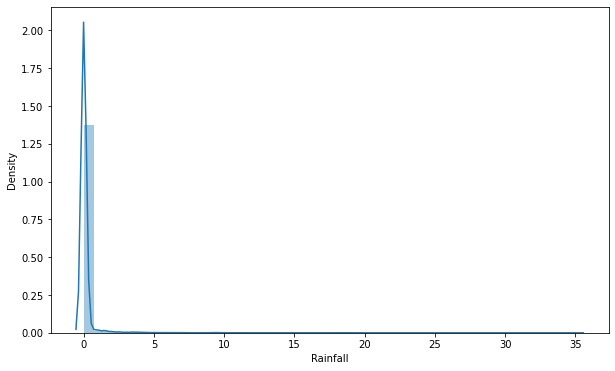

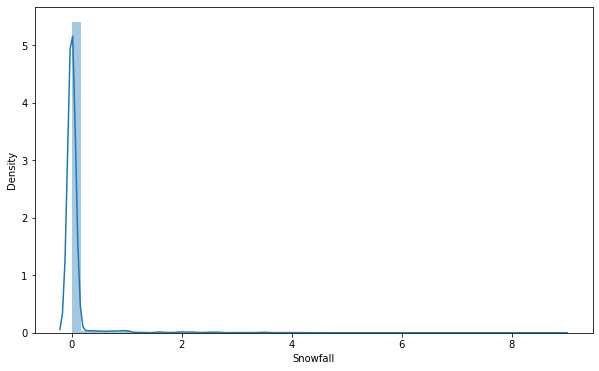

In [38]:
#printing displots to analyze the distribution of all numerical features
for col in numerical_features:
  plt.figure(figsize=(10,6))
  sns.distplot(x=bike_df[col])
  plt.xlabel(col)
plt.show()

#### Numerical vs.Rented_Bike_Count


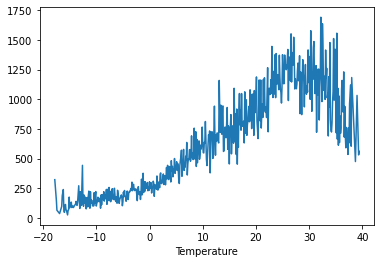

In [39]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Temperature" 
bike_df.groupby('Temperature').mean()['Rented_Bike_Count'].plot()

* ***From the above plot we see that people like to ride bikes when it is pretty hot around 25°C in average***

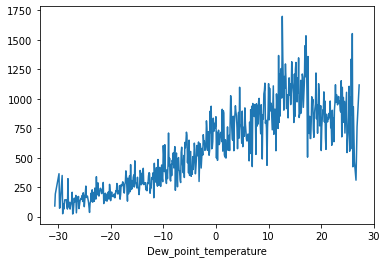

In [40]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Dew_point_temperature" 
bike_df.groupby('Dew_point_temperature').mean()['Rented_Bike_Count'].plot()

* ***We can see from the plot that, on the y-axis, the amount of rented bike is very low When we have more than 4 cm of snow, the bike rents is much lower***

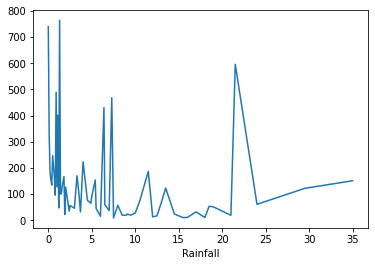

In [41]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Rainfall" 
bike_df.groupby('Rainfall').mean()['Rented_Bike_Count'].plot()


* ***We can see from the above plot that even if it rains a lot the demand of of rent bikes is not decreasing, here for example even if we have 20 mm of rain there is a big peak of rented bikes***

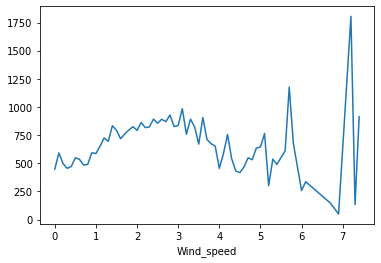

In [42]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Wind_speed" 
bike_df.groupby('Wind_speed').mean()['Rented_Bike_Count'].plot()

* ***We can see from the above plot that the demand of rented bike is uniformly distribute despite of wind speed but when the speed of wind was 7 m/s then the demand of bike also increase that clearly means peoples love to ride bikes when its little windy.***

####Regression plot

* ***The regression plots in seaborn are primarily intended to add a visual guide that helps to emphasize patterns in a dataset during exploratory data analyses. Regression plots as the name suggests creates a regression line between 2 parameters and helps to visualize their linear relationships.***

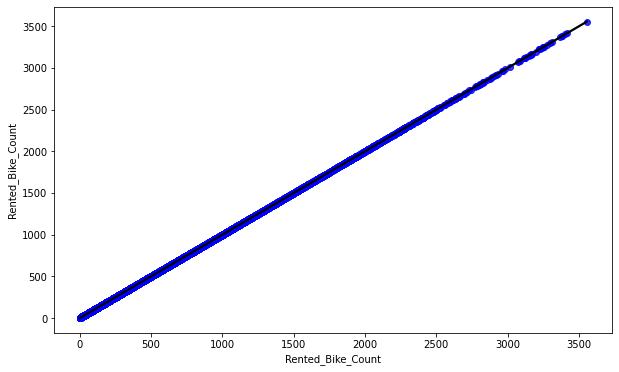

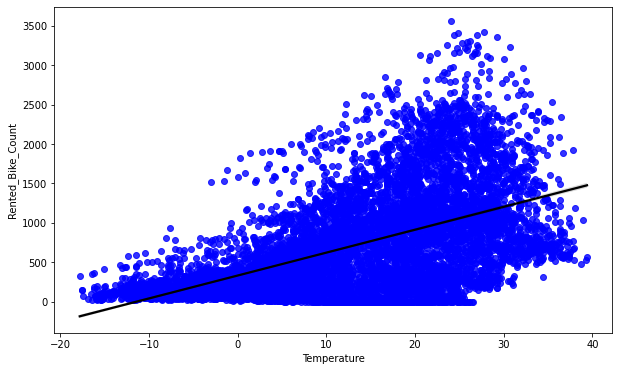

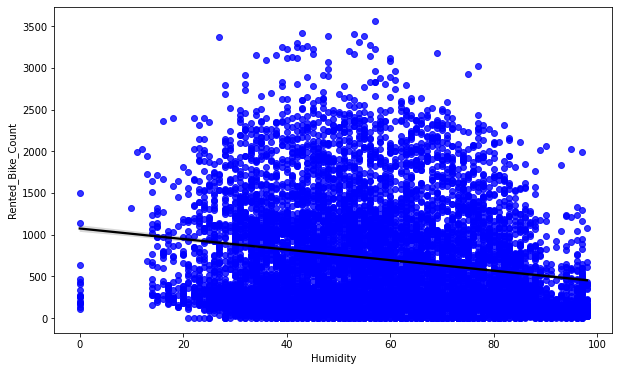

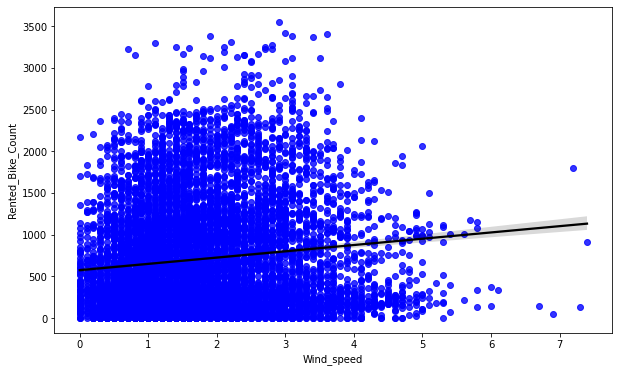

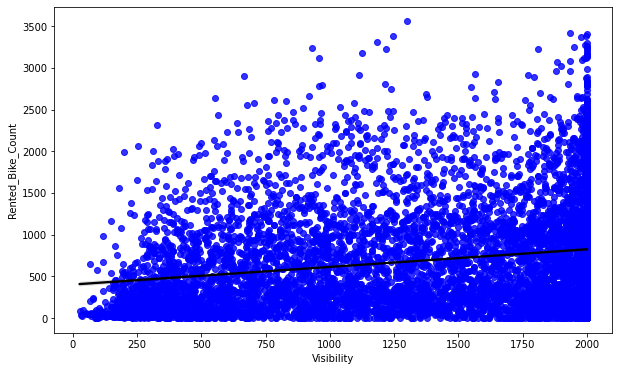

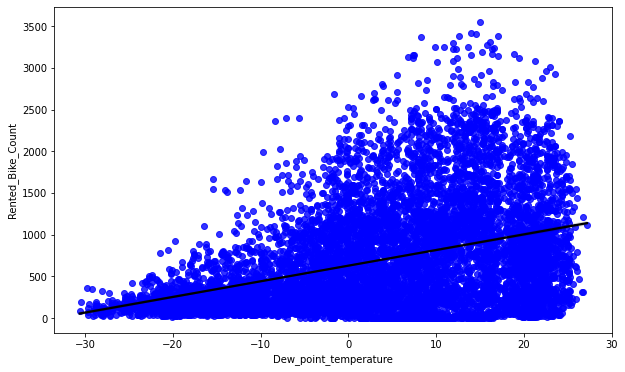

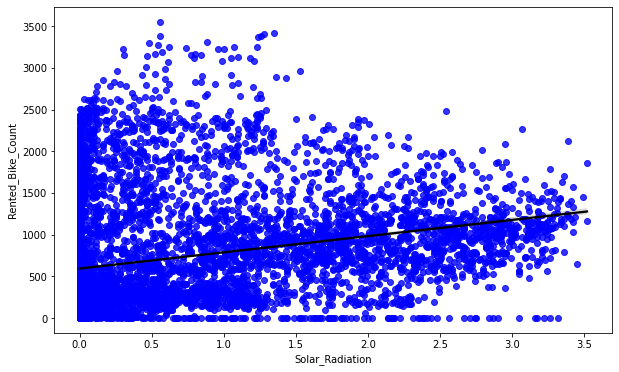

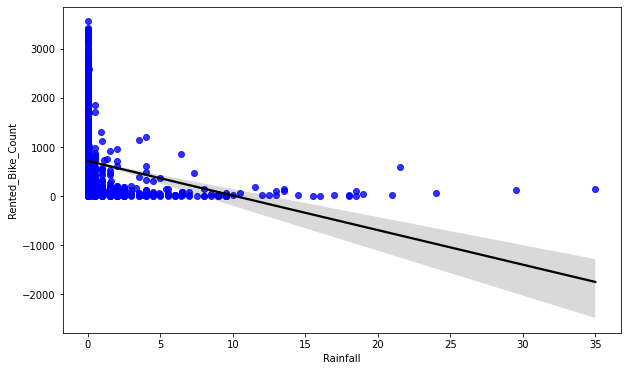

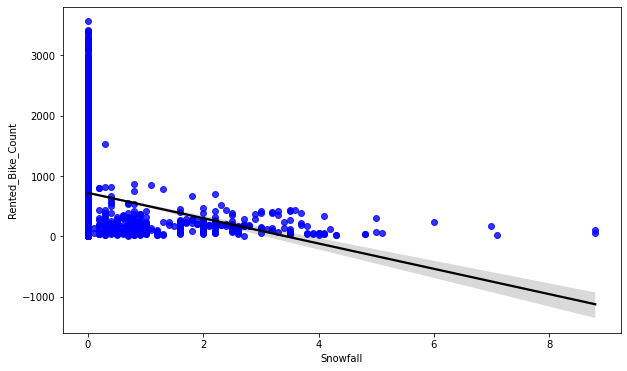

In [43]:
#printing the regression plot for all the numerical features
for col in numerical_features:
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=bike_df[col],y=bike_df['Rented_Bike_Count'],scatter_kws={"color": 'blue'}, line_kws={"color": "black"})

* ***From the above regression plot of all numerical features we see that the columns  'Temperature', 'Wind_speed','Visibility', 'Dew_point_temperature', 'Solar_Radiation' are positively relation to the target variable.***


* ***which means the rented bike count increases with increase of these features.***
* ***'Rainfall','Snowfall','Humidity' these features are negatively related with the target variaable which means the rented bike count decreases when these features increase.***

##**Normalise Rented_Bike_Count column data**

* ***The data normalization (also referred to as data pre-processing) is a basic element of data mining. It means transforming the data, namely converting the source data in to another format that allows processing data effectively. The main purpose of data normalization is to minimize or even exclude duplicated data***

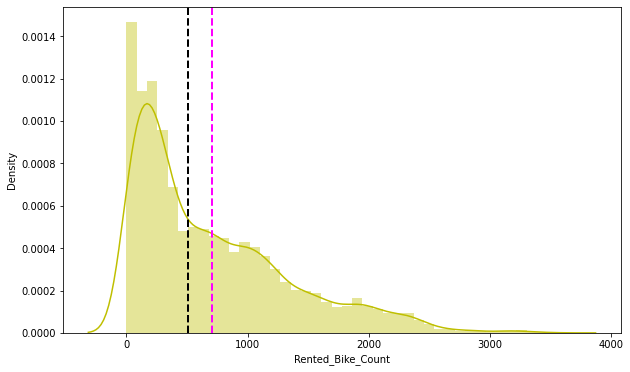

In [44]:
#Distribution plot of Rented Bike Count
plt.figure(figsize=(10,6))
plt.xlabel('Rented_Bike_Count')
plt.ylabel('Density')
ax=sns.distplot(bike_df['Rented_Bike_Count'],hist=True ,color="y")
ax.axvline(bike_df['Rented_Bike_Count'].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(bike_df['Rented_Bike_Count'].median(), color='black', linestyle='dashed', linewidth=2)
plt.show()

* ***The above graph shows that Rented Bike Count has moderate right skewness. Since the assumption of linear regression is that 'the distribution of dependent variable has to be normal', so we should perform some operation to make it normal.***

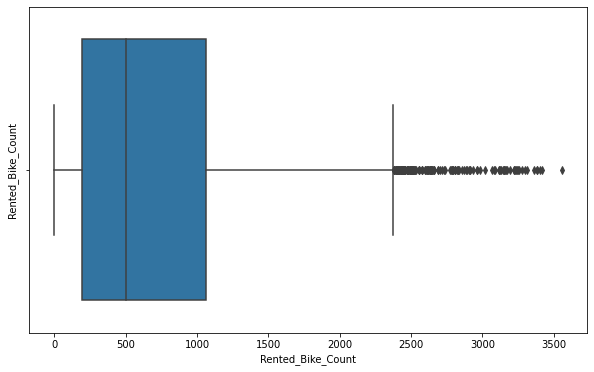

In [45]:
#Boxplot of Rented Bike Count to check outliers
plt.figure(figsize=(10,6))
plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=bike_df['Rented_Bike_Count'])
plt.show()

* ***The above boxplot shows that we have detect outliers in Rented Bike Count column***

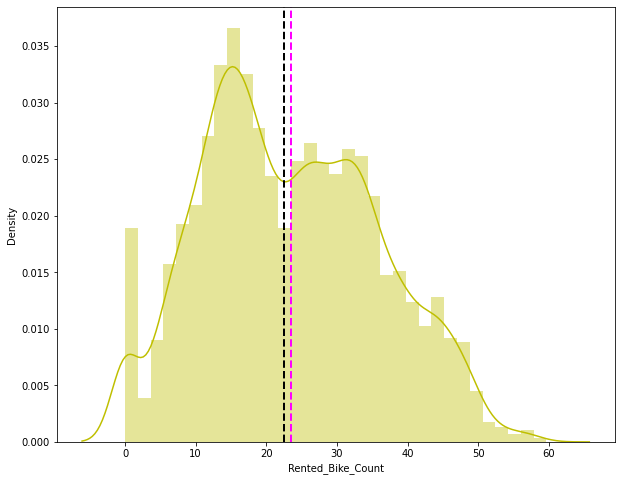

In [46]:
#Applying square root to Rented Bike Count to improve skewness
plt.figure(figsize=(10,8))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')

ax=sns.distplot(np.sqrt(bike_df['Rented_Bike_Count']), color="y")
ax.axvline(np.sqrt(bike_df['Rented_Bike_Count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt(bike_df['Rented_Bike_Count']).median(), color='black', linestyle='dashed', linewidth=2)

plt.show()

* ***Since we have generic rule of applying Square root for the skewed variable in order to make it normal .After applying Square root to the skewed Rented Bike Count, here we get almost normal distribution.***

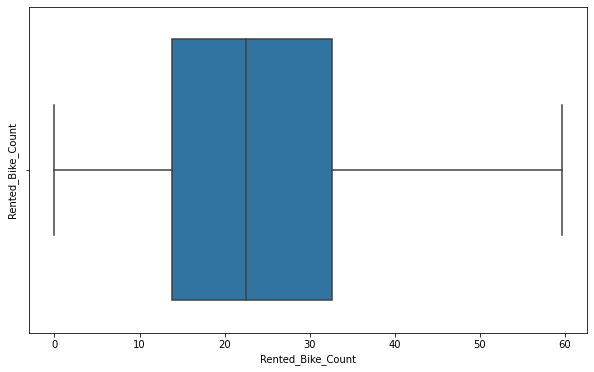

In [47]:
#After applying sqrt on Rented Bike Count check wheater we still have outliers 
plt.figure(figsize=(10,6))

plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=np.sqrt(bike_df['Rented_Bike_Count']))
plt.show()

In [48]:
bike_df.corr()

,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
Rented_Bike_Count,1.000000,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Temperature,0.538558,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity,-0.199780,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind_speed,0.121108,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility,0.199280,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew_point_temperature,0.379788,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar_Radiation,0.261837,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall,-0.123074,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall,-0.141804,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


* ***After applying Square root to the Rented Bike Count column, we find that there is no outliers present.***

##**Checking of Correlation between variables**

###Checking in OLS Model

**Ordinary least squares (OLS) regression is a statistical method of analysis that estimates the relationship between one or more independent variables and a dependent variable**

In [49]:
#import the module
#assign the 'x','y' value
import statsmodels.api as sm
X = bike_df[[ 'Temperature','Humidity',
       'Wind_speed', 'Visibility','Dew_point_temperature',
       'Solar_Radiation', 'Rainfall', 'Snowfall']]
Y =bike_df['Rented_Bike_Count']
bike_df.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


In [50]:
#add a constant column
X = sm.add_constant(X)
X

,const,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
0,1.0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,1.0,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,1.0,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,1.0,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,1.0,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
8755,1.0,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0
8756,1.0,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0
8757,1.0,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0
8758,1.0,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0


In [51]:
## fit a OLS model 

model= sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented_Bike_Count   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     723.1
Date:                Mon, 12 Dec 2022   Prob (F-statistic):               0.00
Time:                        16:45:40   Log-Likelihood:                -66877.
No. Observations:                8760   AIC:                         1.338e+05
Df Residuals:                    8751   BIC:                         1.338e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   844.6495    106.296      7.946      0.000     636.285    1053.014
Temperature              36.5270      4.169      8.762      0.000      28.355      44.699
Humidity                -10.5077      1.184     -8.872      0.000     -12.829      -8.186
Wind_speed               52.4810      5.661      9.271      0.000      41.385      63.577
Visibility               -0.0097      0.011     -0.886      0.376      -0.031       0.012
Dew_point_temperature    -0.7829      4.402     -0.178      0.859      -9.411       7.846
Solar_Radiation        -118.9772      8.670    -13.724      0.000    -135.971    -101.983
Rainfall                -50.7083      4.932    -10.282      0.000     -60.376     -41.041
Snowfall                 41.0307     12.806      3.204      0.001      15.929      66.133
==============================================================================
Omnibus:                      957.371   Durbin-Watson:                   0.338
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1591.019
Skew:                           0.769   Prob(JB):                         0.00
Kurtosis:                       4.412   Cond. No.                     3.11e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* **R sqauare and Adj Square are near to each other. 40% of variance in the Rented Bike count is  explained by the model.**
*  **For F statistic , P value is less than 0.05 for 5% levelof significance.**
*  **P value of dew point temp and visibility are very high and they are not significant.**

*  **Omnibus tests the skewness and kurtosis of the residuals. Here the value of Omnibus is high., it shows we have skewness in our data.**
*  **The condition number is large, 3.11e+04. This might indicate that there are strong multicollinearity or other numerical problems**   
*  **Durbin-Watson tests for autocorrelation of the residuals. Here value is less than 0.5. We can say that there exists a positive auto correlation among the variables.**

In [52]:
X.corr()

,const,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,NaN,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity,NaN,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind_speed,NaN,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility,NaN,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew_point_temperature,NaN,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar_Radiation,NaN,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall,NaN,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall,NaN,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


* ***From the OLS model we find that the 'Temperature' and  'Dew_point_temperature' are highly correlated so we need to drop one of them.***
* ***for droping the we check the (P>|t|) value from above table and we can see that the 'Dew_point_temperature' value is higher so we need to drop Dew_point_temperature column***
* ***For clarity, we use visualisation i.e heatmap in next step***




###**Heatmap**

* **we check correletion betweeen variables using Correlation heatmap, it is graphical representation of correlation matrix representing correlation between different variables**

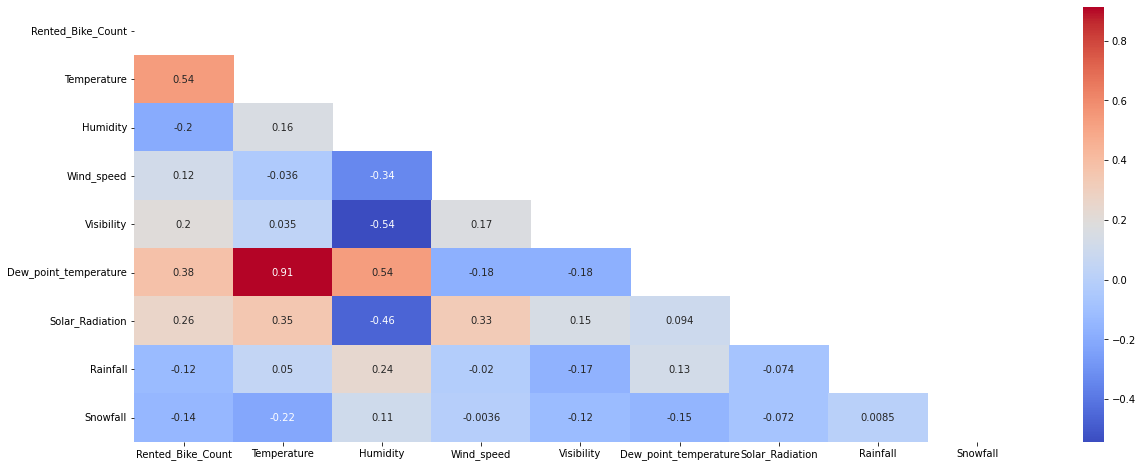

In [53]:
# plot the Correlation matrix
plt.figure(figsize=(20,8))
correlation=bike_df.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap((correlation),mask=mask, annot=True,cmap='coolwarm')

**We can observe on the heatmap that on the target variable line the most positively correlated variables to the rent are :***

* the temperature
* the dew point temperature
* the solar radiation

***And most negatively correlated variables are:***
* Humidity
* Rainfall


* ***From the above correlation heatmap, We see that there is a positive 
correlation between columns 'Temperature' and 'Dew point temperature' i.e 0.91 so even if we drop this column then it dont affects the outcome of our analysis. And they have the same variations.. so we can drop the column 'Dew point temperature(°C)'.***

In [54]:
#drop the Dew point temperature column
data=bike_df.drop(['Dew_point_temperature'],axis=1)

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Rented_Bike_Count  8760 non-null   int64   
 1   Hour               8760 non-null   category
 2   Temperature        8760 non-null   float64 
 3   Humidity           8760 non-null   int64   
 4   Wind_speed         8760 non-null   float64 
 5   Visibility         8760 non-null   int64   
 6   Solar_Radiation    8760 non-null   float64 
 7   Rainfall           8760 non-null   float64 
 8   Snowfall           8760 non-null   float64 
 9   Seasons            8760 non-null   object  
 10  Holiday            8760 non-null   object  
 11  Functioning_Day    8760 non-null   object  
 12  month              8760 non-null   category
 13  weekdays_weekend   8760 non-null   category
dtypes: category(3), float64(5), int64(3), object(3)
memory usage: 779.8+ KB


## Create the dummy variables 

**A dataset may contain various type of values, sometimes it consists of categorical values. So, in-order to use those categorical value for programming efficiently we create dummy variables.**

In [56]:
#Assign all catagoriacla features to a variable
categorical_features=list(data.select_dtypes(['object','category']).columns)
categorical_features=pd.Index(categorical_features)
categorical_features

Index(['Hour', 'Seasons', 'Holiday', 'Functioning_Day', 'month',
       'weekdays_weekend'],
      dtype='object')

In [57]:
#creat a copy
bike_df_copy = bike_df

def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

for col in categorical_features:
    bike_df_copy = one_hot_encoding(bike_df_copy, col)
bike_df_copy.head()

,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Hour_1,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekdays_weekend_1
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,1,0
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0


#**Model Training**

##**Train Test split for regression**

Before, fitting any model it is a rule of thumb to split the dataset into a training and test set. This means some proportions of the data will go into training the model and some portion will be used to evaluate how our model is performing on any unseen data. The proportions may vary from 60:40, 70:30, 75:25 depending on the person but mostly used is 80:20 for training and testing respectively. In this step we will split our data into training and testing set using scikit learn library.

In [58]:
#Assign the value in X and Y
X = bike_df_copy.drop(columns=['Rented_Bike_Count'], axis=1)
y = np.sqrt(bike_df_copy['Rented_Bike_Count'])

In [59]:
X.head()

,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Hour_1,Hour_2,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekdays_weekend_1
0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [60]:
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented_Bike_Count, dtype: float64

In [61]:
#Creat test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=0)
print(X_train.shape)
print(X_test.shape)

(7008, 48)
(1752, 48)


In [62]:
bike_df_copy.describe().columns

Index(['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall', 'Hour_1', 'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6',
       'Hour_7', 'Hour_8', 'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12',
       'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18',
       'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23', 'Seasons_Spring',
       'Seasons_Summer', 'Seasons_Winter', 'Holiday_No Holiday',
       'Functioning_Day_Yes', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'month_12', 'weekdays_weekend_1'],
      dtype='object')

* The mean squared error (MSE) tells you how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them.
It’s called the mean squared error as you’re finding the average of a set of errors. The lower the MSE, the better the forecast.

* MSE formula = (1/n) * Σ(actual – forecast)2
Where:

*   n = number of items,
* Σ = summation notation,
* Actual = original or observed y-value,
* Forecast = y-value from regression.

* Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors).

* Mean Absolute Error (MAE) are metrics used to evaluate a Regression Model. ... Here, errors are the differences between the predicted values (values predicted by our regression model) and the actual values of a variable.

* R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

* Formula for R-Squared
\begin{aligned} &\text{R}^2 = 1 - \frac{ \text{Unexplained Variation} }{ \text{Total Variation} } \\ \end{aligned} 
​
  
* R 
2
 =1− 
Total Variation
Unexplained Variation
​

* Adjusted R-squared is a modified version of R-squared that has been adjusted for the number of predictors in the model.
​


# **LINEAR REGRESSION**

Regression models describe the relationship between variables by fitting a line to the observed data. Linear regression models use a straight line

Linear regression uses a linear approach to model the relationship between independent and dependent variables. In simple words its a best fit line drawn over the values of independent variables and dependent variable. In case of single variable, the formula is same as straight line equation having an intercept and slope.

$$ \text{y_pred} = \beta_0 + \beta_1x$$

where $$\beta_0 \text{ and } \beta_1$$ are intercept and slope respectively.

In case of multiple features the formula translates into:

$$ \text{y_pred} = \beta_0 + \beta_1x_1 + \beta_2x_2 +\beta_3x_3 +.....$$

where x_1,x_2,x_3 are the features values and 
$$\beta_0,\beta_1,\beta_2.....$$
 are weights assigned to each of the features. These become the parameters which the algorithm tries to learn using Gradient descent.

Gradient descent is the process by which the algorithm tries to update the parameters using  a loss function . Loss function is nothing but the diffence between the actual values and predicted values(aka error or residuals). There are different types of loss function but this is the simplest one. Loss function summed over all observation gives the cost functions. The role of gradient descent is to update the parameters till the cost function is minimized i.e., a global minima is reached. It uses a hyperparameter 'alpha' that gives a weightage to the cost function and decides on how big the steps to take. Alpha is called as the learning rate. It is always necesarry to keep an optimal value of alpha as high and low values of alpha might make the gradient descent overshoot or get stuck at a local minima. There are also some basic assumptions that must be fulfilled before implementing this algorithm. They are:

1. No multicollinearity in the dataset.

2. Independent variables should show linear relationship with dv.

3. Residual mean should be 0 or close to 0.

4. There should be no heteroscedasticity i.e., variance should be constant along the line of best fit.



Let us now implement our first model.
We will be using LinearRegression from scikit library.


In [63]:
#import the packages
from sklearn.linear_model import LinearRegression
reg= LinearRegression().fit(X_train, y_train)

In [64]:
#check the score
reg.score(X_train, y_train)

0.7763914442014882

In [65]:
#check the coefficeint
reg.coef_

array([ 8.84474654e-02, -2.36799497e-01, -4.69259546e-02,  1.10567883e-03,
        4.64162370e-01,  1.13037638e+00, -1.47364449e+00,  2.59539041e-02,
       -1.92887697e+00, -4.85853300e+00, -7.22416698e+00, -9.43155603e+00,
       -9.09143903e+00, -4.00904703e+00,  2.18845143e+00,  7.48464762e+00,
        1.14857169e+00, -3.37793115e+00, -3.58223158e+00, -2.84335893e+00,
       -2.93022867e+00, -2.84130462e+00, -1.65188737e+00,  3.19784330e-01,
        4.01223374e+00,  1.04949862e+01,  6.88237060e+00,  6.04020640e+00,
        6.32664215e+00,  5.09449206e+00,  1.54901033e+00, -4.07609537e-01,
       -1.46972707e+00, -4.62171276e+00,  3.43401264e+00,  2.84176876e+01,
       -6.95221638e-01, -1.44854191e+00, -4.24417330e-01,  1.46534970e+00,
        4.44135581e+00, -1.87690272e+00, -4.03418016e+00,  3.10659264e-01,
        3.33902650e+00,  2.84936361e+00,  2.12057665e+00, -1.36200872e+00])

In [66]:
#get the X_train and X-test value
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

In [67]:
#import the packages
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
#calculate MSE
MSE_lr= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_train, y_pred_train)
print("MAE :",MAE_lr)



#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score(y_train, y_pred_train)
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 34.510206668471255
RMSE : 5.874538847302931
MAE : 4.429293284626387
R2 : 0.7763914442014882
Adjusted R2 : 0.7700889129752236


**Looks like our r2 score value is 0.776 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [68]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
training_df=pd.DataFrame(dict1,index=[1])

In [69]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error(y_test, y_pred_test)
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_test, y_pred_test)
print("MAE :",MAE_lr)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score((y_test), (y_pred_test))
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_lr )


MSE : 33.788208155457944
RMSE : 5.812762523573275
MAE : 4.407854959720877
R2 : 0.7854529737322447
Adjusted R2 : 0.7794058467440754


**The r2_score for the test set is 0.78. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**




In [70]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
test_df=pd.DataFrame(dict2,index=[1])

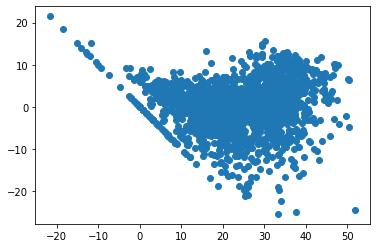

In [71]:
### Heteroscadacity
plt.scatter((y_pred_test),(y_test)-(y_pred_test))

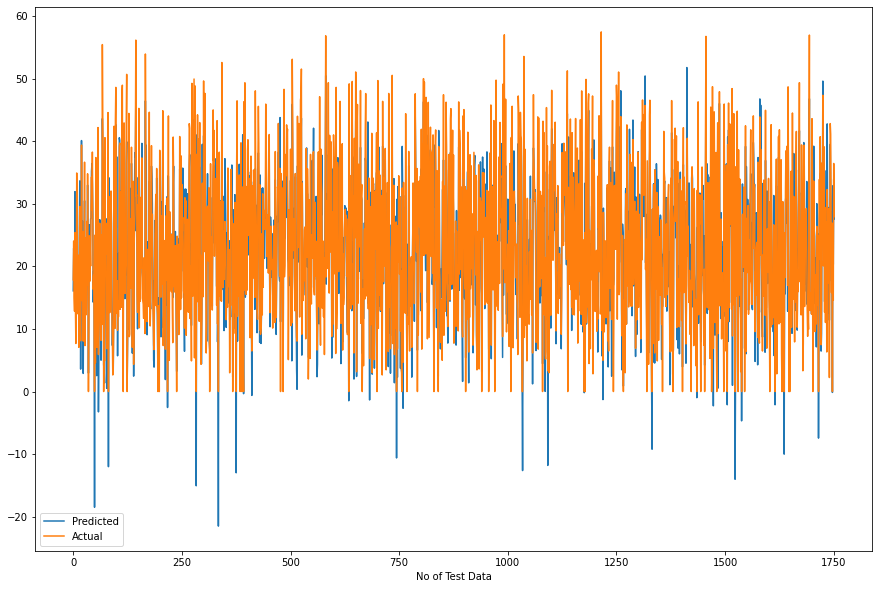

In [72]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(y_pred_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

#**LASSO REGRESSION** 

In [73]:
# Create an instance of Lasso Regression implementation
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0, max_iter=3000)
# Fit the Lasso model
lasso.fit(X_train, y_train)
# Create the model score
print(lasso.score(X_test, y_test), lasso.score(X_train, y_train))

0.38354931956674243 0.4059516284119845


In [74]:
#get the X_train and X-test value
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)

In [75]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#calculate MSE
MSE_l= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_train, y_pred_train_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2_l)
Adjusted_R2_l = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 91.68134019453143
RMSE : 9.575037346900086
MAE : 7.25236195572733
R2 : 0.4059516284119845
Adjusted R2 : 0.38920804541948606


**Looks like our r2 score value is 0.40 that means our model is not able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [76]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [77]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error(y_test, y_pred_test_lasso)
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_test, y_pred_test_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score((y_test), (y_pred_test_lasso))
print("R2 :",r2_l)
Adjusted_R2_l=(1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 97.08251039591772
RMSE : 9.853045742100141
MAE : 7.442888428031137
R2 : 0.38354931956674243
Adjusted R2 : 0.36617431506833


**The r2_score for the test set is 0.38. This means our linear model is  not
performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**




In [78]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2),
       }
test_df=test_df.append(dict2,ignore_index=True)

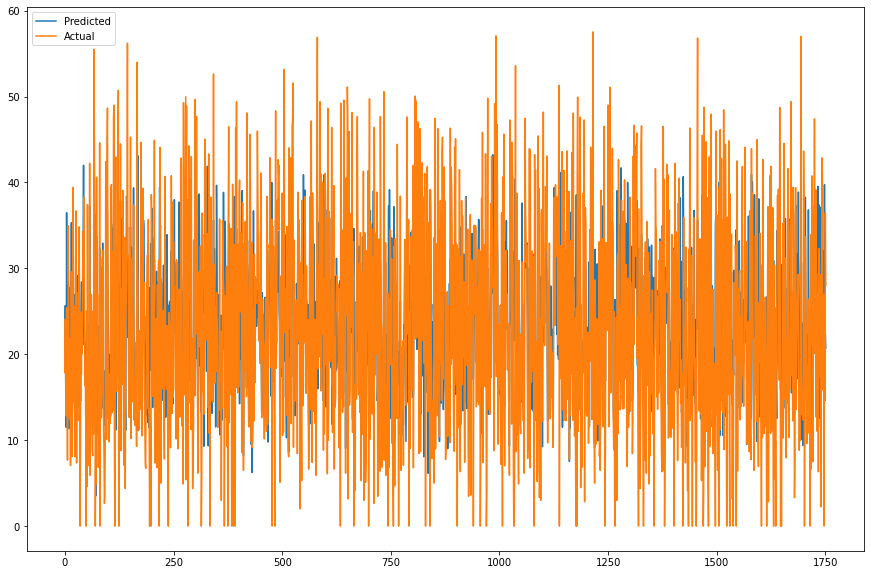

In [79]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_lasso))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

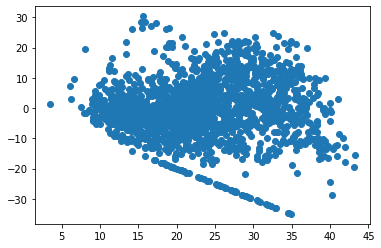

In [80]:
### Heteroscadacity
plt.scatter((y_pred_test_lasso),(y_test-y_pred_test_lasso))

# **RIDGE REGRESSION**

In [81]:
#import the packages
from sklearn.linear_model import Ridge

ridge= Ridge(alpha=0.1)

In [82]:
#FIT THE MODEL
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [83]:
#check the score
ridge.score(X_train, y_train)

0.77639137812618

In [84]:
#get the X_train and X-test value
y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

In [85]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_r= mean_squared_error((y_train), (y_pred_train_ridge))
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_train, y_pred_train_ridge)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score(y_train, y_pred_train_ridge)
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 34.5102168660799
RMSE : 5.874539715252583
MAE : 4.429365493378445
R2 : 0.77639137812618
Adjusted R2 : 0.7700888450375462


**Looks like our r2 score value is 0.775 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [86]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [87]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_r= mean_squared_error(y_test, y_pred_test_ridge)
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_test, y_pred_test_ridge)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score((y_test), (y_pred_test_ridge))
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 33.78968070637089
RMSE : 5.81288918751862
MAE : 4.408050206642082
R2 : 0.7854436233867648
Adjusted R2 : 0.7793962328539196


**The r2_score for the test set is 0.785. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**




In [88]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
test_df=test_df.append(dict2,ignore_index=True)

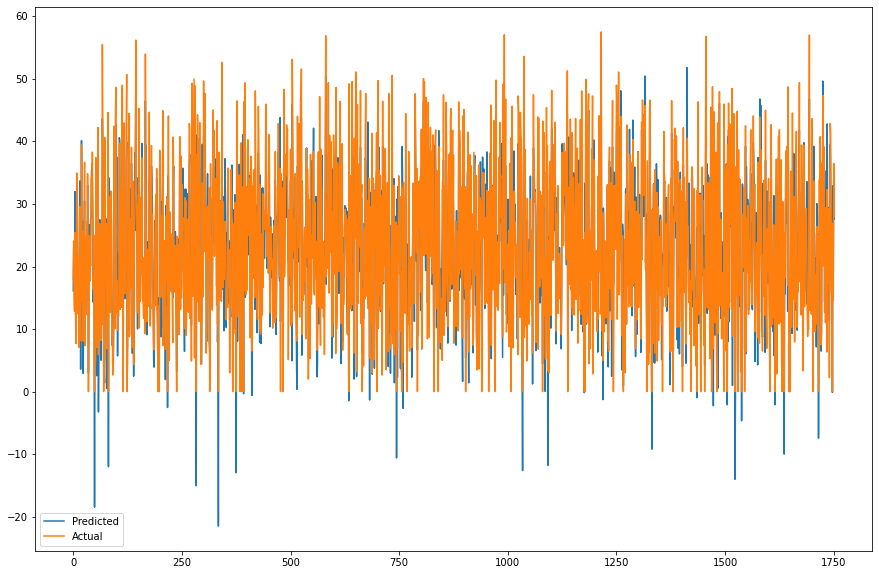

In [89]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot((y_pred_test_ridge))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

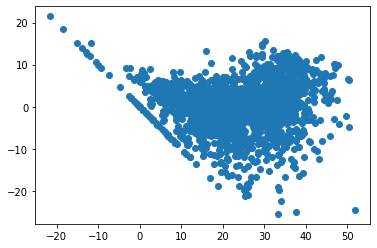

In [90]:
### Heteroscadacity
plt.scatter((y_pred_test_ridge),(y_test)-(y_pred_test_ridge))

# **ELASTIC NET REGRESSION**

In [91]:
#import the packages
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [92]:
#FIT THE MODEL
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [93]:
#check the score
elasticnet.score(X_train, y_train)

0.6293675511822518

In [94]:
#get the X_train and X-test value
y_pred_train_en=elasticnet.predict(X_train)
y_pred_test_en=elasticnet.predict(X_test)

In [95]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_e= mean_squared_error((y_train), (y_pred_train_en))
print("MSE :",MSE_e)

#calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


#calculate MAE
MAE_e= mean_absolute_error(y_train, y_pred_train_en)
print("MAE :",MAE_e)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_e= r2_score(y_train, y_pred_train_en)
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 57.200863182835384
RMSE : 7.563125225912591
MAE : 5.764899713362052
R2 : 0.6293675511822518
Adjusted R2 : 0.6189210699472243


**Looks like our r2 score value is 0.62 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [96]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Elastic net regression ',
       'MAE':round((MAE_e),3),
       'MSE':round((MSE_e),3),
       'RMSE':round((RMSE_e),3),
       'R2_score':round((r2_e),3),
       'Adjusted R2':round((Adjusted_R2_e ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [97]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_e= mean_squared_error(y_test, y_pred_test_en)
print("MSE :",MSE_e)

#calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


#calculate MAE
MAE_e= mean_absolute_error(y_test, y_pred_test_en)
print("MAE :",MAE_e)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_e= r2_score((y_test), (y_pred_test_en))
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score((y_test), (y_pred_test_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 59.85394939968249
RMSE : 7.736533422643665
MAE : 5.850925555497894
R2 : 0.6199417620786665
Adjusted R2 : 0.6092296097473546


**The r2_score for the test set is 0.619. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**




In [98]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Elastic net regression Test',
       'MAE':round((MAE_e),3),
       'MSE':round((MSE_e),3),
       'RMSE':round((RMSE_e),3),
       'R2_score':round((r2_e),3),
       'Adjusted R2':round((Adjusted_R2_e ),2)}
test_df=test_df.append(dict2,ignore_index=True)

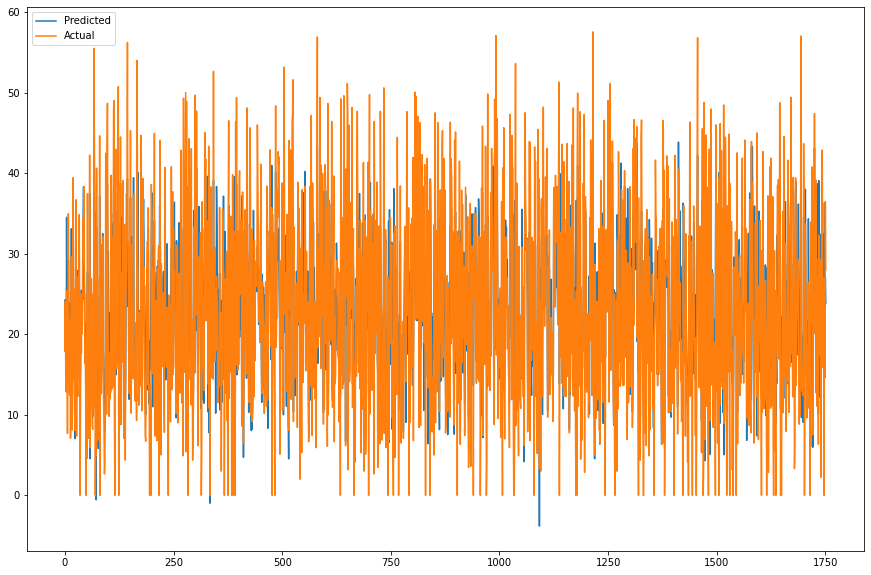

In [99]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_en))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

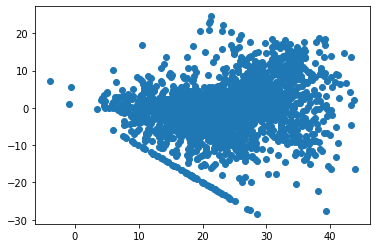

In [100]:
### Heteroscadacity
plt.scatter((y_pred_test_en),(y_test)-(y_pred_test_en))

# **DECISION TREE**

---



In [101]:
#import the packages
from sklearn.tree import DecisionTreeRegressor
decision_regressor = DecisionTreeRegressor(criterion='mse', max_depth=8,
                      max_features=9, max_leaf_nodes=100,)
decision_regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=9,
                      max_leaf_nodes=100)

In [102]:
#get the X_train and X-test value
y_pred_train_d = decision_regressor.predict(X_train)
y_pred_test_d = decision_regressor.predict(X_test)

In [103]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",decision_regressor.score(X_train,y_train))

#calculate MSE
MSE_d= mean_squared_error(y_train, y_pred_train_d)
print("MSE :",MSE_d)

#calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


#calculate MAE
MAE_d= mean_absolute_error(y_train, y_pred_train_d)
print("MAE :",MAE_d)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_d= r2_score(y_train, y_pred_train_d)
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


Model Score: 0.7061947027453763
MSE : 45.343888977508335
RMSE : 6.73378712000226
MAE : 4.958208027017617
R2 : 0.7061947027453763
Adjusted R2 : 0.6979136374087809


Looks like our r2 score value is 0.63 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [104]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Dicision tree regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
training_df=training_df.append(dict1,ignore_index=True)

In [105]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_d= mean_squared_error(y_test, y_pred_test_d)
print("MSE :",MSE_d)

#calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


#calculate MAE
MAE_d= mean_absolute_error(y_test, y_pred_test_d)
print("MAE :",MAE_d)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_d= r2_score((y_test), (y_pred_test_d))
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score((y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 53.8380752985937
RMSE : 7.337443376176316
MAE : 5.385801422602287
R2 : 0.6581411212412303
Adjusted R2 : 0.6485056390448585


**The r2_score for the test set is 0.66. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**




In [106]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Dicision tree regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
test_df=test_df.append(dict2,ignore_index=True)

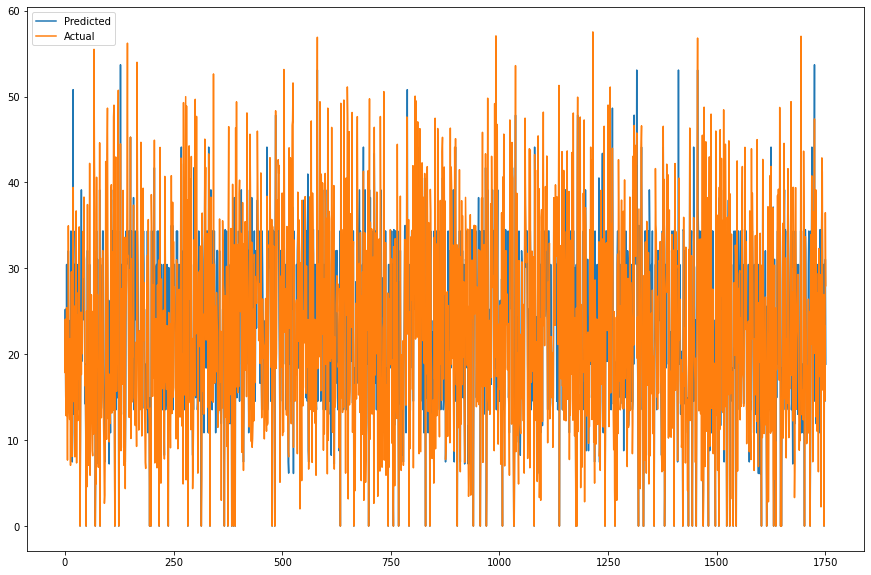

In [107]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot((np.array(y_pred_test_d)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

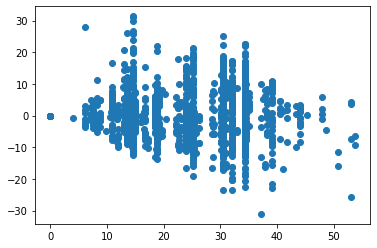

In [108]:
### Heteroscadacity
plt.scatter((y_pred_test_d),(y_test)-(y_pred_test_d))

# **RANDOM FOREST**

In [109]:
#import the packages
from sklearn.ensemble import RandomForestRegressor
# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor()

rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [110]:
# Making predictions on train and test data

y_pred_train_r = rf_model.predict(X_train)
y_pred_test_r = rf_model.predict(X_test)


In [111]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",rf_model.score(X_train,y_train))

#calculate MSE
MSE_rf= mean_squared_error(y_train, y_pred_train_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_train, y_pred_train_r)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score(y_train, y_pred_train_r)
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


Model Score: 0.9896063374393117
MSE : 1.604086398800012
RMSE : 1.2665253249738089
MAE : 0.7967121053805274
R2 : 0.9896063374393117
Adjusted R2 : 0.989313386292563


**Looks like our r2 score value is 0.98 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**



In [112]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [113]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_rf= mean_squared_error(y_test, y_pred_test_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_test, y_pred_test_r)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score((y_test), (y_pred_test_r))
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 12.950726617909542
RMSE : 3.598711799784687
MAE : 2.1907915421261723
R2 : 0.9177659889185237
Adjusted R2 : 0.9154481776842835


**The r2_score for the test set is 0.91. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**




In [114]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
test_df=test_df.append(dict2,ignore_index=True)

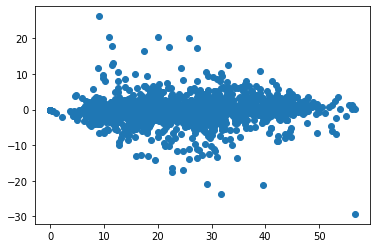

In [115]:
### Heteroscadacity
plt.scatter((y_pred_test_r),(y_test)-(y_pred_test_r))

In [116]:
rf_model.feature_importances_

array([3.10108064e-01, 1.52966707e-01, 1.11616751e-02, 1.08206253e-02,
       1.87494750e-02, 2.87793073e-02, 2.93040297e-02, 1.45759709e-03,
       4.92583348e-03, 1.34229540e-02, 1.97057416e-02, 2.96261198e-02,
       2.63732466e-02, 8.47106316e-03, 4.21396220e-03, 1.46932709e-02,
       8.48407880e-04, 1.91707075e-03, 9.15883896e-04, 2.46746034e-04,
       2.42849683e-04, 3.43416327e-04, 1.20899279e-03, 3.17682233e-03,
       1.02874703e-02, 3.20225066e-02, 1.64143603e-02, 1.18510612e-02,
       1.25301255e-02, 9.73303099e-03, 3.89420661e-03, 3.44432063e-03,
       9.75661658e-04, 7.77528458e-03, 4.01775620e-03, 1.53512034e-01,
       2.60225718e-04, 3.68976799e-03, 1.08527607e-03, 1.31757885e-03,
       2.10438109e-03, 6.12724604e-04, 1.29881493e-03, 8.79952716e-04,
       2.93543321e-03, 5.76404280e-03, 8.02493806e-04, 1.91116274e-02])

In [117]:
importances = rf_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [118]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [119]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
0,Temperature,0.31
35,Functioning_Day_Yes,0.15
1,Humidity,0.15
25,Hour_18,0.03
5,Solar_Radiation,0.03
6,Rainfall,0.03
12,Hour_5,0.03
11,Hour_4,0.03
10,Hour_3,0.02
26,Hour_19,0.02


In [120]:
#FIT THE MODEL
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [121]:
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

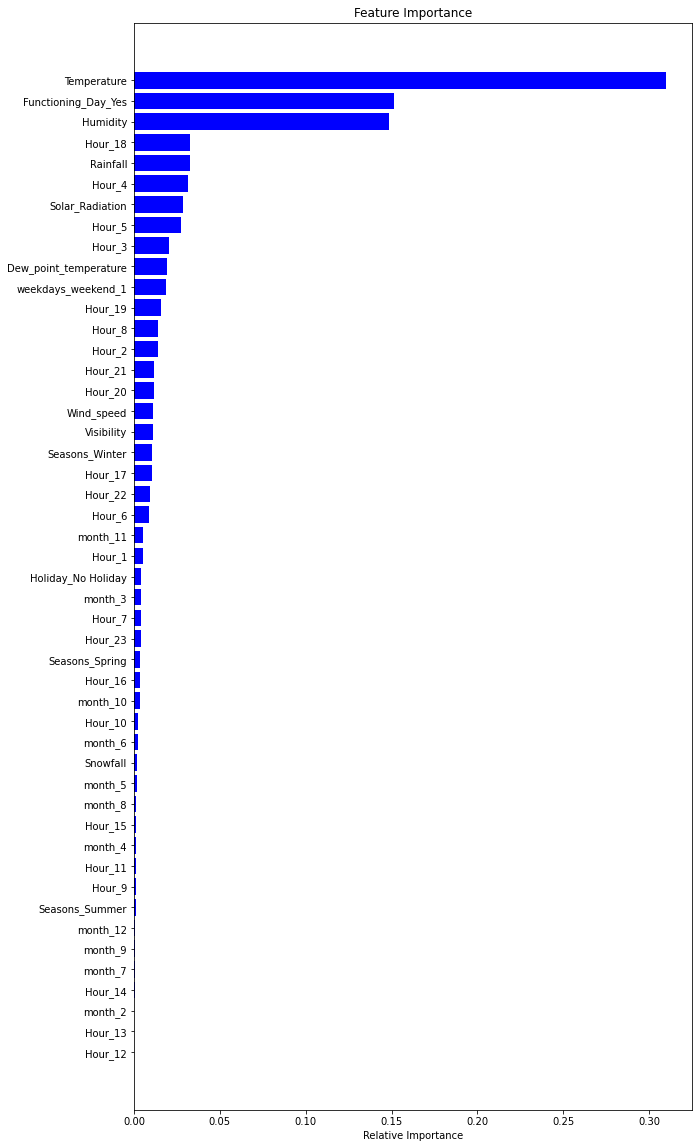

In [122]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

# **GRADIENT BOOSTING**

In [123]:
#import the packages
from sklearn.ensemble import GradientBoostingRegressor
# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()


gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [124]:
# Making predictions on train and test data

y_pred_train_g = gb_model.predict(X_train)
y_pred_test_g = gb_model.predict(X_test)


In [125]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",gb_model.score(X_train,y_train))
#calculate MSE
MSE_gb= mean_squared_error(y_train, y_pred_train_g)
print("MSE :",MSE_gb)

#calculate RMSE
RMSE_gb=np.sqrt(MSE_gb)
print("RMSE :",RMSE_gb)


#calculate MAE
MAE_gb= mean_absolute_error(y_train, y_pred_train_g)
print("MAE :",MAE_gb)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_gb= r2_score(y_train, y_pred_train_g)
print("R2 :",r2_gb)
Adjusted_R2_gb = (1-(1-r2_score(y_train, y_pred_train_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


Model Score: 0.8806349033807067
MSE : 18.421988097117637
RMSE : 4.292084353448525
MAE : 3.2543765872424966
R2 : 0.8806349033807067
Adjusted R2 : 0.8772705318964283


**Looks like our r2 score value is 0.87 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [126]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Gradient boosting regression ',
       'MAE':round((MAE_gb),3),
       'MSE':round((MSE_gb),3),
       'RMSE':round((RMSE_gb),3),
       'R2_score':round((r2_gb),3),
       'Adjusted R2':round((Adjusted_R2_gb ),2),
       }
training_df=training_df.append(dict1,ignore_index=True)

In [127]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_gb= mean_squared_error(y_test, y_pred_test_g)
print("MSE :",MSE_gb)

#calculate RMSE
RMSE_gb=np.sqrt(MSE_gb)
print("RMSE :",RMSE_gb)


#calculate MAE
MAE_gb= mean_absolute_error(y_test, y_pred_test_g)
print("MAE :",MAE_gb)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_gb= r2_score((y_test), (y_pred_test_g))
print("R2 :",r2_gb)
Adjusted_R2_gb = (1-(1-r2_score((y_test), (y_pred_test_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 21.116960752385452
RMSE : 4.595319439645676
MAE : 3.451114324919712
R2 : 0.8659123587616067
Adjusted R2 : 0.8621330241876531


In [128]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Gradient boosting regression ',
       'MAE':round((MAE_gb),3),
       'MSE':round((MSE_gb),3),
       'RMSE':round((RMSE_gb),3),
       'R2_score':round((r2_gb),3),
       'Adjusted R2':round((Adjusted_R2_gb ),2),
       }
test_df=test_df.append(dict2,ignore_index=True)

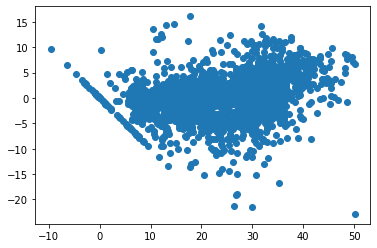

In [129]:
### Heteroscadacity
plt.scatter((y_pred_test_g),(y_test)-(y_pred_test_g))

In [130]:
gb_model.feature_importances_

array([3.13994053e-01, 1.23119824e-01, 3.35468305e-04, 4.19701204e-04,
       1.18703027e-02, 4.91937423e-02, 6.13118715e-02, 2.35135371e-05,
       5.03659318e-04, 5.98949494e-03, 1.42856919e-02, 2.51765482e-02,
       2.35911105e-02, 6.21418770e-03, 1.33092318e-03, 9.39453753e-03,
       0.00000000e+00, 2.79831927e-03, 1.36040440e-03, 0.00000000e+00,
       0.00000000e+00, 5.52535077e-05, 0.00000000e+00, 3.36752595e-04,
       6.84933509e-03, 2.94705345e-02, 1.67626414e-02, 1.22945794e-02,
       1.55059747e-02, 1.27080621e-02, 5.25460006e-04, 0.00000000e+00,
       0.00000000e+00, 3.51246316e-02, 3.06747774e-03, 1.78947197e-01,
       0.00000000e+00, 1.30705909e-03, 0.00000000e+00, 3.47559901e-04,
       3.25917898e-03, 0.00000000e+00, 1.63178910e-03, 0.00000000e+00,
       8.03528480e-03, 5.42626453e-03, 7.08934617e-04, 1.67226767e-02])

In [131]:
importances = gb_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [132]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [133]:
importance_df.head()

,Feature,Feature Importance
0,Temperature,0.31
1,Humidity,0.12
2,Wind_speed,0.00
3,Visibility,0.00
4,Dew_point_temperature,0.01


In [134]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
0,Temperature,0.31
35,Functioning_Day_Yes,0.18
1,Humidity,0.12
6,Rainfall,0.06
5,Solar_Radiation,0.05
33,Seasons_Winter,0.04
11,Hour_4,0.03
25,Hour_18,0.03
28,Hour_21,0.02
26,Hour_19,0.02


In [135]:
gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [136]:
features = X_train.columns
importances = gb_model.feature_importances_
indices = np.argsort(importances)

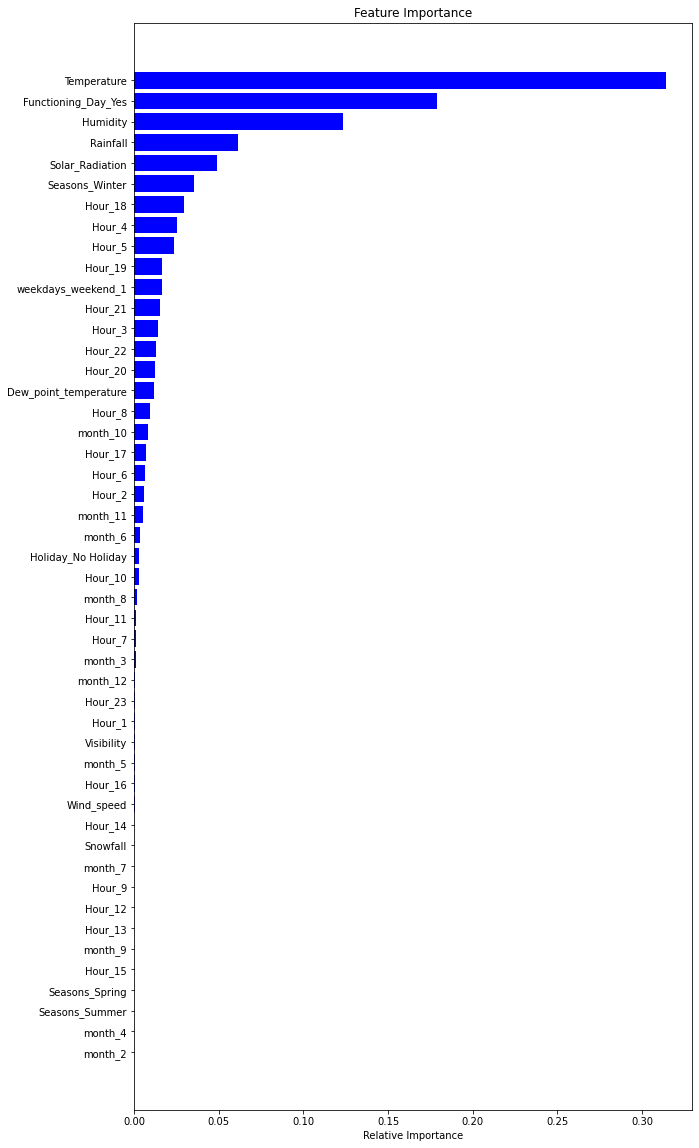

In [137]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

#**XG Boosting**

In [138]:
#importing the required packages and classes
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
from xgboost import XGBRegressor
import xgboost as xgb

In [139]:
xgb_model = XGBRegressor()
xgb_model.fit(X_train,y_train)

[16:46:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [140]:
y_pred_train_x = xgb_model.predict(X_train)
y_pred_test_x= xgb_model.predict(X_test)

In [141]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",xgb_model.score(X_train,y_train))
#calculate MSE
MSE_x= mean_squared_error(y_train, y_pred_train_x)
print("MSE :",MSE_x)

#calculate RMSE
RMSE_x=np.sqrt(MSE_gb)
print("RMSE :",RMSE_x)


#calculate MAE
MAE_x= mean_absolute_error(y_train, y_pred_train_x)
print("MAE :",MAE_x)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_xgb= r2_score(y_train, y_pred_train_x)
print("R2 :",r2_xgb)
Adjusted_R2_xgb = (1-(1-r2_score(y_train, y_pred_train_x))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_x))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


Model Score: 0.8769664053677897
MSE : 18.988158850900067
RMSE : 4.595319439645676
MAE : 3.292111247972364
R2 : 0.8769664053677897
Adjusted R2 : 0.8734986352313563


In [142]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'XG boosting regression ',
       'MAE':round((MAE_x),3),
       'MSE':round((MSE_x),3),
       'RMSE':round((RMSE_x),3),
       'R2_score':round((r2_xgb),3),
       'Adjusted R2':round((Adjusted_R2_xgb ),2),
       }
training_df=training_df.append(dict1,ignore_index=True)

In [143]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_x= mean_squared_error(y_test, y_pred_test_x)
print("MSE :",MSE_x)

#calculate RMSE
RMSE_x=np.sqrt(MSE_x)
print("RMSE :",RMSE_x)


#calculate MAE
MAE_x= mean_absolute_error(y_test, y_pred_test_x)
print("MAE :",MAE_x)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_xgb= r2_score((y_test), (y_pred_test_x))
print("R2 :",r2_xgb)
Adjusted_R2_xgb = (1-(1-r2_score((y_test), (y_pred_test_x)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_x)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 21.65927263699807
RMSE : 4.653952367289342
MAE : 3.4886686991770977
R2 : 0.8624688082300729
Adjusted R2 : 0.8585924152735511


In [144]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'XG boosting regression ',
       'MAE':round((MAE_x),3),
       'MSE':round((MSE_x),3),
       'RMSE':round((RMSE_x),3),
       'R2_score':round((r2_xgb),3),
       'Adjusted R2':round((Adjusted_R2_xgb ),2),
       }
test_df=test_df.append(dict2,ignore_index=True)

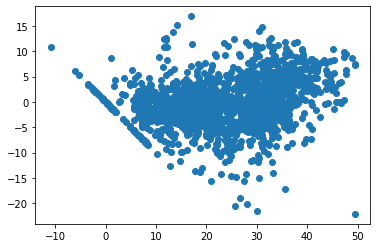

In [145]:
### Heteroscadacity
plt.scatter((y_pred_test_x),(y_test)-(y_pred_test_x))

In [146]:
xgb_model.feature_importances_

array([0.07547996, 0.0472413 , 0.00207564, 0.00263511, 0.01094567,
       0.04539713, 0.05029301, 0.00034564, 0.00707487, 0.02166136,
       0.03216396, 0.03849029, 0.03794986, 0.0229086 , 0.        ,
       0.01774183, 0.        , 0.0118075 , 0.00900716, 0.        ,
       0.        , 0.00119355, 0.        , 0.0040804 , 0.01702599,
       0.05257207, 0.03941274, 0.03351888, 0.04594588, 0.03661482,
       0.00738534, 0.        , 0.00141201, 0.07057757, 0.00818572,
       0.14292711, 0.        , 0.00865255, 0.        , 0.0085601 ,
       0.012942  , 0.        , 0.01440037, 0.        , 0.02583895,
       0.01782504, 0.00443843, 0.01327157], dtype=float32)

In [147]:
features = X_train.columns
importances = xgb_model.feature_importances_
indices = np.argsort(importances)


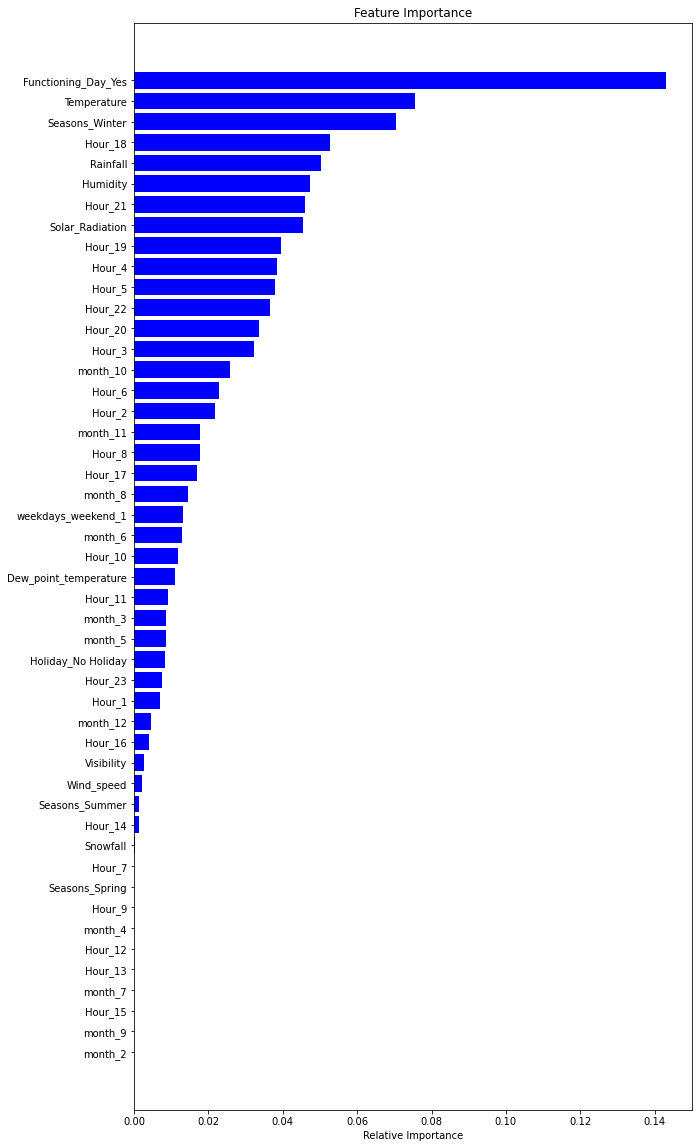

In [148]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

#**Hyperparameter tuning** 

Before proceding to try next models, let us try to tune some hyperparameters and see if the performance of our model improves.

Hyperparameter tuning is the process of choosing a set of optimal hyperparameters for a learning algorithm. A hyperparameter is a model argument whose value is set before the learning process begins. The key to machine learning algorithms is hyperparameter tuning.

<b> Using GridSearchCV

##**Gradient Boosting Regressor with GridSearchCV**

### **Provide the range of values for chosen hyperparameters**

In [149]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [150]:
param_dict

{'n_estimators': [50, 80, 100],
 'max_depth': [4, 6, 8],
 'min_samples_split': [50, 100, 150],
 'min_samples_leaf': [40, 50]}

### **Importing Gradient Boosting Regressor**

In [151]:
from sklearn.model_selection import GridSearchCV
# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()

# Grid search
gb_grid = GridSearchCV(estimator=gb_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2)

gb_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.8s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.8s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.9s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.9s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.2s
[CV] END max_depth=4, min_sam

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

In [152]:
gb_grid.best_estimator_

GradientBoostingRegressor(max_depth=8, min_samples_leaf=40,
                          min_samples_split=50)

In [153]:
gb_optimal_model = gb_grid.best_estimator_

In [154]:
gb_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 100}

In [155]:
# Making predictions on train and test data

y_pred_train_g_g = gb_optimal_model.predict(X_train)
y_pred_g_g= gb_optimal_model.predict(X_test)

In [156]:
from sklearn.metrics import mean_squared_error
print("Model Score:",gb_optimal_model.score(X_train,y_train))
MSE_gbh= mean_squared_error(y_train, y_pred_train_g_g)
print("MSE :",MSE_gbh)

RMSE_gbh=np.sqrt(MSE_gbh)
print("RMSE :",RMSE_gbh)


MAE_gbh= mean_absolute_error(y_train, y_pred_train_g_g)
print("MAE :",MAE_gbh)


from sklearn.metrics import r2_score
r2_gbh= r2_score(y_train, y_pred_train_g_g)
print("R2 :",r2_gbh)
Adjusted_R2_gbh = (1-(1-r2_score(y_train, y_pred_train_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


Model Score: 0.9526767618289217
MSE : 7.303543121027876
RMSE : 2.7025068216431714
MAE : 1.8390529902282275
R2 : 0.9526767618289217
Adjusted R2 : 0.9513429301012577


In [157]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Gradient Boosting gridsearchcv ',
       'MAE':round((MAE_gbh),3),
       'MSE':round((MSE_gbh),3),
       'RMSE':round((RMSE_gbh),3),
       'R2_score':round((r2_gbh),3),
       'Adjusted R2':round((Adjusted_R2_gbh ),2)
      }
training_df=training_df.append(dict1,ignore_index=True)

In [158]:
from sklearn.metrics import mean_squared_error
MSE_gbh= mean_squared_error(y_test, y_pred_g_g)
print("MSE :",MSE_gbh)

RMSE_gbh=np.sqrt(MSE_gbh)
print("RMSE :",RMSE_gbh)


MAE_gbh= mean_absolute_error(y_test, y_pred_g_g)
print("MAE :",MAE_gbh)


from sklearn.metrics import r2_score
r2_gbh= r2_score((y_test), (y_pred_g_g))
print("R2 :",r2_gbh)
Adjusted_R2_gbh = (1-(1-r2_score(y_test, y_pred_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_g_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 11.940063991574059
RMSE : 3.4554397681878437
MAE : 2.328538298835564
R2 : 0.9241834544450349
Adjusted R2 : 0.9220465230377312


In [159]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Gradient Boosting gridsearchcv ',
       'MAE':round((MAE_gbh),3),
       'MSE':round((MSE_gbh),3),
       'RMSE':round((RMSE_gbh),3),
       'R2_score':round((r2_gbh),3),
       'Adjusted R2':round((Adjusted_R2_gbh ),2)
      }
test_df=test_df.append(dict2,ignore_index=True)

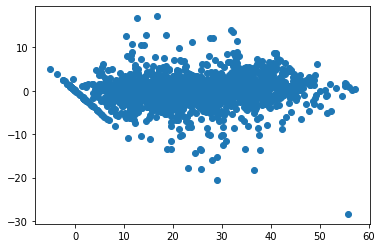

In [160]:
### Heteroscadacity
plt.scatter((y_pred_g_g),(y_test)-(y_pred_g_g))

In [161]:
gb_optimal_model.feature_importances_

array([3.11908286e-01, 1.38845898e-01, 5.47850931e-03, 4.99131526e-03,
       1.57164995e-02, 3.36162750e-02, 4.55185342e-02, 9.55001188e-04,
       1.07401879e-03, 9.22538250e-03, 1.92088726e-02, 2.97911834e-02,
       2.67800246e-02, 7.96580888e-03, 5.17867570e-03, 1.23445815e-02,
       3.17774019e-04, 3.60297749e-03, 1.50543165e-03, 1.18498562e-04,
       1.17974951e-04, 1.45295105e-04, 1.95354261e-04, 1.23917244e-03,
       8.14251107e-03, 3.19734208e-02, 1.76077267e-02, 1.31601807e-02,
       1.29879995e-02, 1.01230464e-02, 2.10423451e-03, 4.69717040e-03,
       3.48802965e-04, 1.80558503e-02, 2.44428973e-03, 1.60753692e-01,
       6.77402010e-05, 1.46478847e-03, 2.27013898e-04, 1.21209591e-03,
       2.66833026e-03, 5.44227015e-04, 3.07085030e-03, 2.17473833e-04,
       5.86007019e-03, 3.55324611e-03, 1.14411220e-03, 2.17297812e-02])

In [162]:
importances = gb_optimal_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [163]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [164]:
importance_df.head()

,Feature,Feature Importance
0,Temperature,0.31
1,Humidity,0.14
2,Wind_speed,0.01
3,Visibility,0.00
4,Dew_point_temperature,0.02


In [165]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
0,Temperature,0.31
35,Functioning_Day_Yes,0.16
1,Humidity,0.14
6,Rainfall,0.05
11,Hour_4,0.03
5,Solar_Radiation,0.03
25,Hour_18,0.03
12,Hour_5,0.03
33,Seasons_Winter,0.02
26,Hour_19,0.02


In [166]:
gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [167]:
features = X_train.columns
importances = gb_model.feature_importances_
indices = np.argsort(importances)

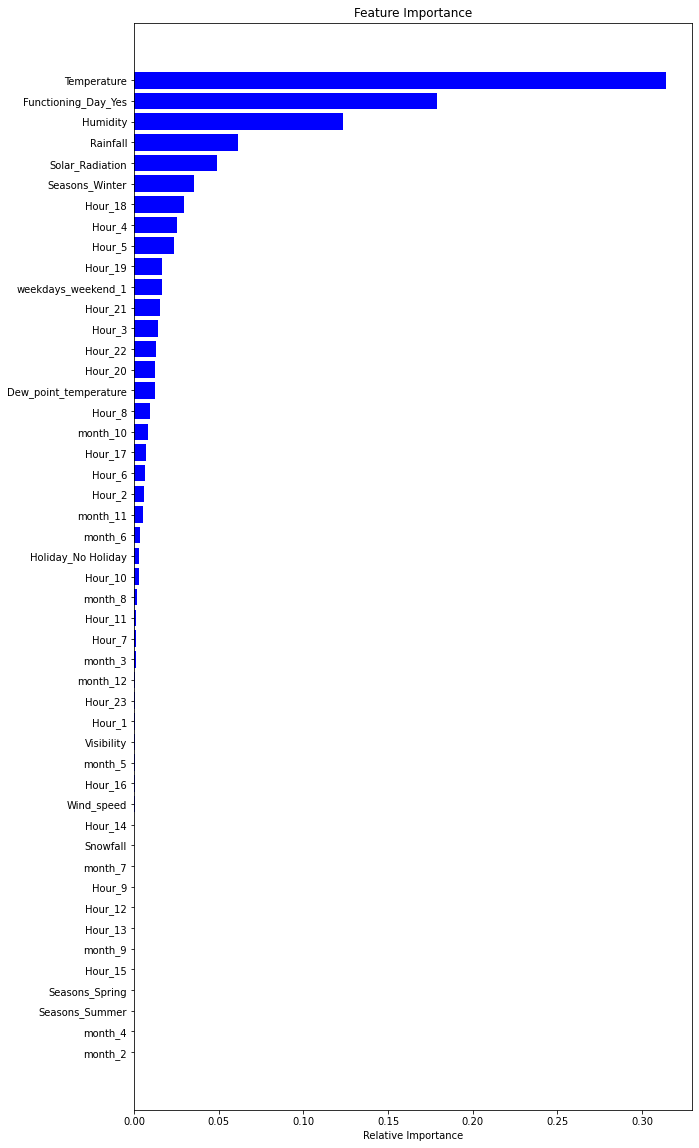

In [168]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

#**XG boosting(tunned)**#

### **Provide the range of values for chosen hyperparameters**


In [169]:
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [250,500,750,1000]}


In [170]:
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
from xgboost import XGBRegressor
import xgboost as xgb

In [171]:
from sklearn.model_selection import GridSearchCV
# Create an instance of the GradientBoostingRegressor
xgb_model = XGBRegressor()

# Grid search

xgb_grid = GridSearchCV(estimator=xgb_model,
                       param_grid = parameters,
                       cv =2,n_jobs=5,verbose=2)

xgb_grid.fit(X_train,y_train)


Fitting 2 folds for each of 36 candidates, totalling 72 fits


GridSearchCV(cv=2, estimator=XGBRegressor(), n_jobs=5,
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.03, 0.05, 0.07],
                         'max_depth': [5, 6, 7], 'min_child_weight': [4],
                         'n_estimators': [250, 500, 750, 1000], 'nthread': [4],
                         'objective': ['reg:linear'], 'silent': [1],
                         'subsample': [0.7]},
             verbose=2)

In [172]:
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

0.9340307133551674
{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 1000, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [173]:
xgb_grid.best_estimator_

XGBRegressor(colsample_bytree=0.7, learning_rate=0.03, max_depth=7,
             min_child_weight=4, n_estimators=1000, nthread=4, silent=1,
             subsample=0.7)

In [174]:
xgb_optimal_model = xgb_grid.best_estimator_

In [175]:
xgb_grid.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.03,
 'max_depth': 7,
 'min_child_weight': 4,
 'n_estimators': 1000,
 'nthread': 4,
 'objective': 'reg:linear',
 'silent': 1,
 'subsample': 0.7}

In [176]:
# Making predictions on train and test data

y_pred_train_x_g = xgb_optimal_model.predict(X_train)
y_pred_test_x_g= xgb_optimal_model.predict(X_test)
print(y_pred_train_x_g)
print(y_pred_test_x_g)

[18.877466 52.835487 25.702662 ... 32.475517 21.850168 22.607904]
[17.175982 24.891502 15.975903 ... 18.812998 34.5333   26.479237]


In [177]:
from sklearn.metrics import mean_squared_error
print("Model Score:",xgb_optimal_model.score(X_train,y_train))
MSE_xgb= mean_squared_error(y_train, y_pred_train_x_g)
print("MSE :",MSE_xgb)

RMSE_xgb=np.sqrt(MSE_xgb)
print("RMSE :",RMSE_xgb)


MAE_xgb= mean_absolute_error(y_train, y_pred_train_x_g)
print("MAE :",MAE_xgb)


from sklearn.metrics import r2_score
r2_xgb= r2_score(y_train, y_pred_train_x_g)
print("R2 :",r2_xgb)
Adjusted_R2_xgb = (1-(1-r2_score(y_train, y_pred_train_x_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_x_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


Model Score: 0.9904645696691797
MSE : 1.4716327388024213
RMSE : 1.213108708567547
MAE : 0.8480102529830761
R2 : 0.9904645696691797
Adjusted R2 : 0.9901958082740656


In [178]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'XGboosting gridsearchcv ',
       'MAE':round((MAE_xgb),3),
       'MSE':round((MSE_xgb),3),
       'RMSE':round((RMSE_xgb),3),
       'R2_score':round((r2_xgb),3),
       'Adjusted R2':round((Adjusted_R2_xgb ),2)
      }
training_df=training_df.append(dict1,ignore_index=True)

In [179]:
from sklearn.metrics import mean_squared_error
MSE_xgb= mean_squared_error(y_test, y_pred_test_x_g)
print("MSE :",MSE_xgb)

RMSE_xgb=np.sqrt(MSE_xgb)
print("RMSE :",RMSE_xgb)


MAE_xgb= mean_absolute_error(y_test, y_pred_test_x_g)
print("MAE :",MAE_xgb)


from sklearn.metrics import r2_score
r2_xgb= r2_score((y_test), (y_pred_test_x_g))
print("R2 :",r2_xgb)
Adjusted_R2_xgb = (1-(1-r2_score(y_test, y_pred_test_x_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_x_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )





MSE : 9.647372566650803
RMSE : 3.1060219842510457
MAE : 2.0190131807014065
R2 : 0.938741495673611
Adjusted R2 : 0.937014890736637


In [180]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'XGboosting gridsearchcv ',
       'MAE':round((MAE_xgb),3),
       'MSE':round((MSE_xgb),3),
       'RMSE':round((RMSE_xgb),3),
       'R2_score':round((r2_xgb),3),
       'Adjusted R2':round((Adjusted_R2_xgb ),2)
      }
test_df=test_df.append(dict2,ignore_index=True)

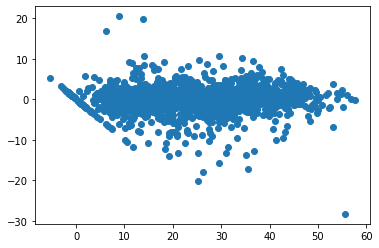

In [190]:
### Heteroscadacity
plt.scatter((y_pred_test_x_g),(y_test)-(y_pred_test_x_g))

In [181]:
xgb_optimal_model.feature_importances_

array([0.02003695, 0.01171988, 0.00136429, 0.00179075, 0.00349987,
       0.00643325, 0.0266967 , 0.00249544, 0.00475985, 0.02574777,
       0.04343376, 0.06950917, 0.06121691, 0.019684  , 0.00784902,
       0.01783092, 0.00247367, 0.01536531, 0.00889522, 0.00187899,
       0.00151947, 0.00148083, 0.00182854, 0.00455957, 0.02477583,
       0.0719838 , 0.03921581, 0.03706931, 0.04452644, 0.03586463,
       0.00985387, 0.00427879, 0.01101671, 0.10346864, 0.00552135,
       0.17111999, 0.00454005, 0.00718823, 0.00230737, 0.0062979 ,
       0.00892363, 0.00178981, 0.00833241, 0.0022709 , 0.01607964,
       0.01215467, 0.00222206, 0.00712802], dtype=float32)

In [182]:
Importances = xgb_optimal_model.feature_importances_

Importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : Importances}

Importance_df = pd.DataFrame(Importance_dict)

In [183]:
Importance_df['Feature Importance'] = round(Importance_df['Feature Importance'],2)

In [184]:
Importance_df.head()

,Feature,Feature Importance
0,Temperature,0.02
1,Humidity,0.01
2,Wind_speed,0.00
3,Visibility,0.00
4,Dew_point_temperature,0.00


In [185]:
Importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
35,Functioning_Day_Yes,0.17
33,Seasons_Winter,0.10
11,Hour_4,0.07
25,Hour_18,0.07
12,Hour_5,0.06
29,Hour_22,0.04
28,Hour_21,0.04
27,Hour_20,0.04
10,Hour_3,0.04
26,Hour_19,0.04


In [186]:
xgb_model.fit(X_train,y_train)

[16:55:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [187]:
features = X_train.columns
Importances = xgb_model.feature_importances_
Indices = np.argsort(importances)

Text(0.5, 0, 'Relative Importances')

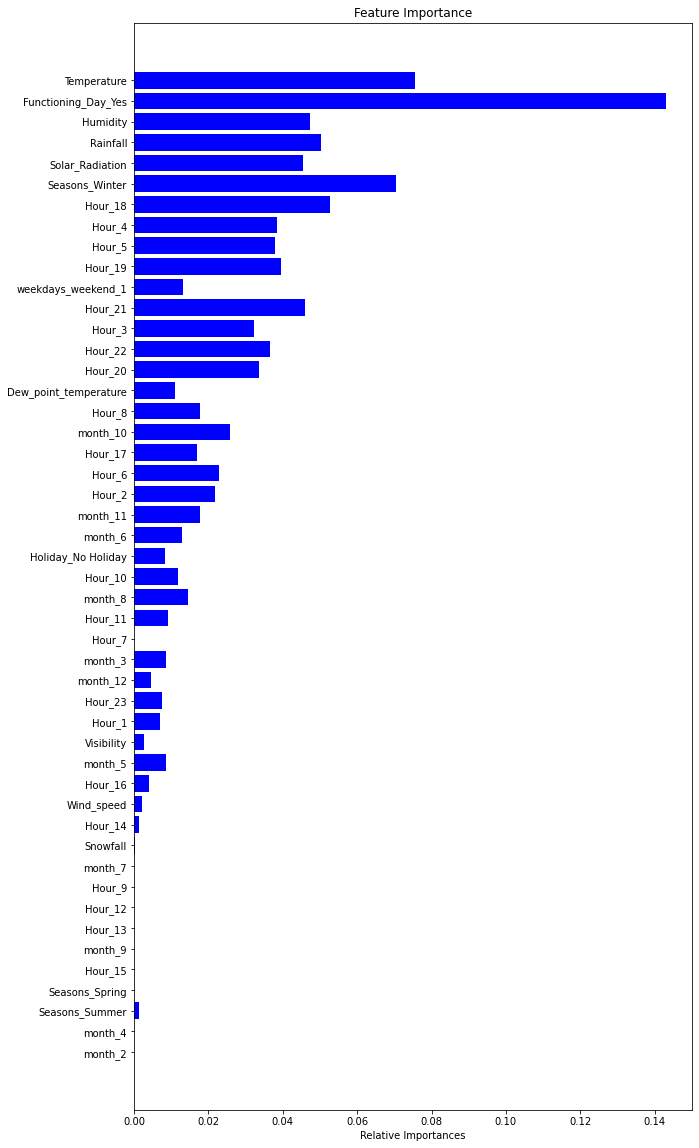

In [188]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(Indices)), Importances[Indices], color='blue', align='center')
plt.yticks(range(len(Indices)), [features[i] for i in Indices])
plt.xlabel('Relative Importances')

#**CONCLUSION**

During the time of our analysis, we initially did EDA on all the features of our datset. We first analysed our dependent variable, 'Rented Bike Count' and also transformed it. Next we analysed categorical variable and dropped the variable who had majority of one class, we also analysed numerical variable, found out the correlation, distribution and their relationship with the dependent variable. We also removed some numerical features who had mostly 0 values and hot encoded the categorical variables.

Next we implemented 7 machine learning algorithms Linear Regression,lasso,ridge,elasticnet,decission tree, Random Forest and XGBoost. We did hyperparameter tuning to improve our model performance. The results of our evaluation are:

In [189]:
# displaying the results of evaluation metric values for all models
result=pd.concat([training_df,test_df],keys=['Training set','Test set'])
result

Model    MAE     MSE   RMSE  \
Training set 0               Linear regression   4.429  34.510  5.875   
             1                Lasso regression   7.252  91.681  9.575   
             2                Ridge regression   4.429  34.510  5.875   
             3          Elastic net regression   5.765  57.201  7.563   
             4        Dicision tree regression   4.958  45.344  6.734   
             5        Random forest regression   0.797   1.604  1.267   
             6    Gradient boosting regression   3.254  18.422  4.292   
             7          XG boosting regression   3.292  18.988  4.595   
             8  Gradient Boosting gridsearchcv   1.839   7.304  2.703   
             9         XGboosting gridsearchcv   0.848   1.472  1.213   
Test set     0               Linear regression   4.408  33.788  5.813   
             1                Lasso regression   7.443  97.083  9.853   
             2                Ridge regression   4.408  33.790  5.813   
             3      Elastic net regression Test  5.851  59.854  7.737   
             4        Dicision tree regression   5.386  53.838  7.337   
             5        Random forest regression   2.191  12.951  3.599   
             6    Gradient boosting regression   3.451  21.117  4.595   
             7          XG boosting regression   3.489  21.659  4.654   
             8  Gradient Boosting gridsearchcv   2.329  11.940  3.455   
             9         XGboosting gridsearchcv   2.019   9.647  3.106   

                R2_score  Adjusted R2  
Training set 0     0.776         0.77  
             1     0.406         0.39  
             2     0.776         0.77  
             3     0.629         0.62  
             4     0.706         0.70  
             5     0.990         0.99  
             6     0.881         0.88  
             7     0.877         0.87  
             8     0.953         0.95  
             9     0.990         0.99  
Test set     0     0.785         0.78  
             1     0.384         0.37  
             2     0.785         0.78  
             3     0.620         0.61  
             4     0.658         0.65  
             5     0.918         0.92  
             6     0.866         0.86  
             7     0.862         0.86  
             8     0.924         0.92  
             9     0.939         0.94


• No overfitting is seen.

• Random forest Regressor and Gradient Boosting gridsearchcv gives the  R2 score of 99% and 95% recpectively for Train Set and 92% for Test set.and xgboosting 99% and 94% on highest

• Feature Importance value for Random Forest,XG boost and Gradient Boost are different.

• We can deploy this model.


However, this is not the ultimate end. As this data is time dependent, the values for variables like temperature, windspeed, solar radiation etc., will not always be consistent. Therefore, there will be scenarios where the model might not perform well. As Machine learning is an exponentially evolving field, we will have to be prepared for all contingencies and also keep checking our model from time to time. Therefore, having a quality knowledge and keeping pace with the ever evolving ML field would surely help one to stay a step ahead in future.